<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Introducción a Redes Neuronales Recurrentes LSTM y GRU</center></span>

<figure>
<center>
<img src="../Imagenes/Barcelona_from_port_entrance,_1856.jpg" width="600" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Barcelona, 1856</p>
</figcaption>
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Barcelona_from_port_entrance,_1856.jpg">Alfred Guesdon</a>, Public domain, via Wikimedia Commons

## <span style="color:#4361EE">Coordinador</span>

- Campo Elías Pardo Turriago, cepardot@unal.edu.co 

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

6. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

7. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

8. Dairo Moreno, damoralesj@unal.edu.co
9. Joan Castro, jocastroc@unal.edu.co
10. Bryan Riveros, briveros@unal.edu.co
11. Rosmer Vargas, rovargasc@unal.edu.co
12. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:blue">Referencias</span>

1. [Introducción a Redes LSTM](Intro_LSTM.ipynb)
2. [Time Series Forecasting with LSTMs using TensorFlow 2 and Keras in Python](https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651/)
3. [Dive into Deep Learnig](https://d2l.ai/)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Series de tiempo y aprendizaje profundo](#Series-de-tiempo-y-aprendizaje-profundo)
* [Modelo recurrente](Modelo-recurrente)
* [Importar módulos requeridos](#Importar-módulos-requeridos)
* [Datos sintéticos](#Datos-sintéticos)
* [Modelo LSTM](#Modelo-LSTM)
* [Modelo GRU](#Modelo-GRU)

## <span style="color:blue">Referencias</span>

1. [Introducción a Redes LSTM](Intro_LSTM.ipynb)
2. [Time Series Forecasting with LSTMs using TensorFlow 2 and Keras in Python](https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651/)

## <span style="color:blue">Introducción</span> 

Los datos de la serie temporal introducen una "dependencia dura" de los pasos de tiempo anteriores, por lo que no se cumple la independencia de las observaciones. ¿Cuáles son algunas de las propiedades que puede tener una serie temporal?

La *estacionalidad* y la *autocorrelación* son algunas de las propiedades de la serie temporal en las que puede estar interesado.

Se dice que una serie de tiempos es **estacionaria** cuando la media y la varianza permanecen constantes en el tiempo. 

Una serie temporal tiene una **tendencia** si la media varía con el tiempo. A menudo puede eliminarlo y hacer que la serie sea estacionaria aplicando transformación(es) logarítmicas de los datos.


**La estacionalidad** se refiere al fenómeno de las variaciones en plazos específicos. por ejemplo, personas que compran más árboles de Navidad durante Navidad (quién lo hubiera pensado). Un enfoque común para eliminar la estacionalidad es usar la diferenciación.

**La autocorrelación** se refiere a la correlación entre el valor actual con una copia de un tiempo anterior (retraso).  

Usaremos redes neuronales para el modelamiento de esta series.

## <span style="color:blue">Series de tiempo y aprendizaje profundo</span> 

Una serie de tiempo univariada es una sucesión de valores en el tiempo, digamos

$$
x_1, x_2, x_3, \ldots x_T.
$$

Por ejemplo consideremos la serie dada por los siguientes valores: 

$$\{3.4, 5.2, 4.6, 6.2, 5.5, 4.0, 7.2, 8.1, 6.9, 9.2, 9.5, 9.8, 8.9, 9.6, 9.7, 9.9 \}
$$


El problema de hacer pronósticos a partir de una serie de tiempo puede verse como un problema de aprendizaje profundo , si la información se organiza inicialmente como un problema de regresión o de clasificación. La siguiente imagen ilustra el procedimiento más común.

<figure>
<img src="../Imagenes/series.jpg"  width="800" height="800" align="center"/> 
</figure>

En la imagen se observan varias cosas interesantes.

1. Los datos de la serie se han organizado como si se tuviera un regresión. La matriz de diseño $X$ está constituida por filas con 8 columnas. El número de columnas corresponde al rezago (número de pasos hacia atrás en la serie para poder predecir el siguiente valor.
2. La variable de interés $Y$ es la variable que se quiere predecir.

Observe que para la primera fila se tomaron los primeros 8 datos de la serie y el valor de la variable a predecir es la novena observación. En la segunda fila nos hemos desplazado un casilla a la derecha en la serie.

Puesto de esta forma, cada fila de la matriz $X$ es independiente de las demás y constituye un tensor de dimensión 1 en la entrada de una red neuronal. La variable target es es el tensor $Y$.La entrada completa a la red es un tensor de dimensión 2.

Visto así, tenemos un problema de aprendizaje profundo, por lo que un por ejemplo un perceptron podría usarse para construir un modelo predictivo.

### <span style="color:#4CC9F0">Predicción a más de un paso</span>

Si lo que se desea es hacer predicciones, varios pasos adelante y no del siguiente paso, el único cambio es en la variable objetivo (target). La imagen muestra el caso de predicciones tres pasos adelante. Observe que en este caso la variable objetivo se toma tres pasos adelante del último elemento de la matriz $X$.

Observe además que las dos últimas filas de la matriz no se pueden utilizar, debido a que no tenemos datos más allá de el último dato de la serie.

<figure>
<img src="../Imagenes/prediccion_tres_dias.jpg"  width="800" height="800" align="center"/> 
</figure>

### <span style="color:#4CC9F0">Series Multivariadas</span>

En algunas situaciones tenemos  más de una serie. La siguiente imagen muestra la nueva situación. 

<figure>
<img src="../Imagenes/Serie_Multivariada.jpg"  width="800" height="800" align="center"/> 
</figure>

Como se observa, ahora los tensores de datos de entrada tiene una dimensión más, la cual en el lenguaje de los modelos convolucionales, que estudiaremos más adelante, llamaremos canales. En el ejemplo, se muestra como se preparan los datos de tres series de tiempos para tratarlos como un problema de aprendizaje profundo.

La imagen ilustra claramente, la semejanza con los datos de imágenes en donde hay varios canales de color. Esta forma de organización de los datos para aprendizaje profundo llevó a los diseñadores de capas neuronales para este tipo de problemas a considerar tanto en problemas de visión por computador como para redes recurrentes, que los tensores de entrada siempre sean de dimensión 3: largo, ancho y canales. 

En el caso de las series siempre se tendrá 

1. tamaño de batch, por ejemplo 32,
2. longitud del rezago, por ejemplo 8,
3. número de canales, por ejemplo 3.

Adicionalmente puede verse que la variable objetivo tiene por lo menos el tamaño del batch. Este tensor puede tener una segunda dimensión que podría corresponder  al número de canales, pero no es necesario. Por ejemplo, podría tenerse que la variable objetivo podría ser el promedio de los valores predichos de cada canal.

### <span style="color:#4CC9F0">Modelos multivariadas multi-cabeza</span>

Una vez las series de tiempo se presentan como un problema de aprendizaje profundo, es posible pensar en diferentes arquitecturas de redes. La siguiente imagen presenta un alternativa que consiste en que cada serie entran por una camino diferente a la red, sigue un camino separado por un tiempo y luego las predicciones se concadenan para llegar a una predicción final.

<figure>
<img src="../Imagenes/multicabeza.jpg"  width="800" height="800" align="center"/> 
</figure>

## <span style="color:blue">Modelo recurrente</span> 

La siguiente imagen muestra la estructura general de una capa recurrente. LSTM es un caso particular y el gráfico ilustra bien la forma de procesamiento.

<figure>
<img src="../Imagenes/modelo_recurrente.jpg"  width="800" height="800" align="center"/> 
</figure>

Comenzaremos con un ejemplo simple de pronosticar los valores de la función seno utilizando una red LSTM simple. Este código puede ser usado como base para la implementación de modelos mas complejos. Para un introducción teórica a las redes LSTM consulte el cuaderno [Redes LSTM (Long Short Term Memory Networks)](Intro_LSTM.ipynb).

## <span style="color:blue">Importar módulos requeridos</span> 

In [3]:

import tensorflow as tf

import numpy as np
import pandas as pd
#import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
#from tensorflow import keras
#
from tensorflow.keras.layers import Input, LSTM, Dense, GRU
from tensorflow.keras.models import Model
#
from tensorflow.keras.optimizers import Adam
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import MinMaxScaler
#
print("Versión de Tensorflow: ", tf.__version__)

Versión de Tensorflow:  2.11.0


### <span style="color:#4CC9F0">Configuraciones básicas generales</span>

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
#
#sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
#

#tf.random.set_seed(RANDOM_SEED)
#


## <span style="color:blue">Datos sintéticos</span>

Vamos a generar unos datos que siguen un comportamiento sinosoidal, con una tendencia ascendiente. Se introduce ruido Gaussiano. 

Modifique las siguientes dos líneas y haga su propia simulación.

In [4]:
#
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
trend = .1
#
time = np.arange(0, 100, 0.1)
sin =  trend*time + np.sin(time) + np.random.normal(scale=0.5, size=len(time))

### <span style="color:#4CC9F0">Primer gráfico. Datos simulados</span>

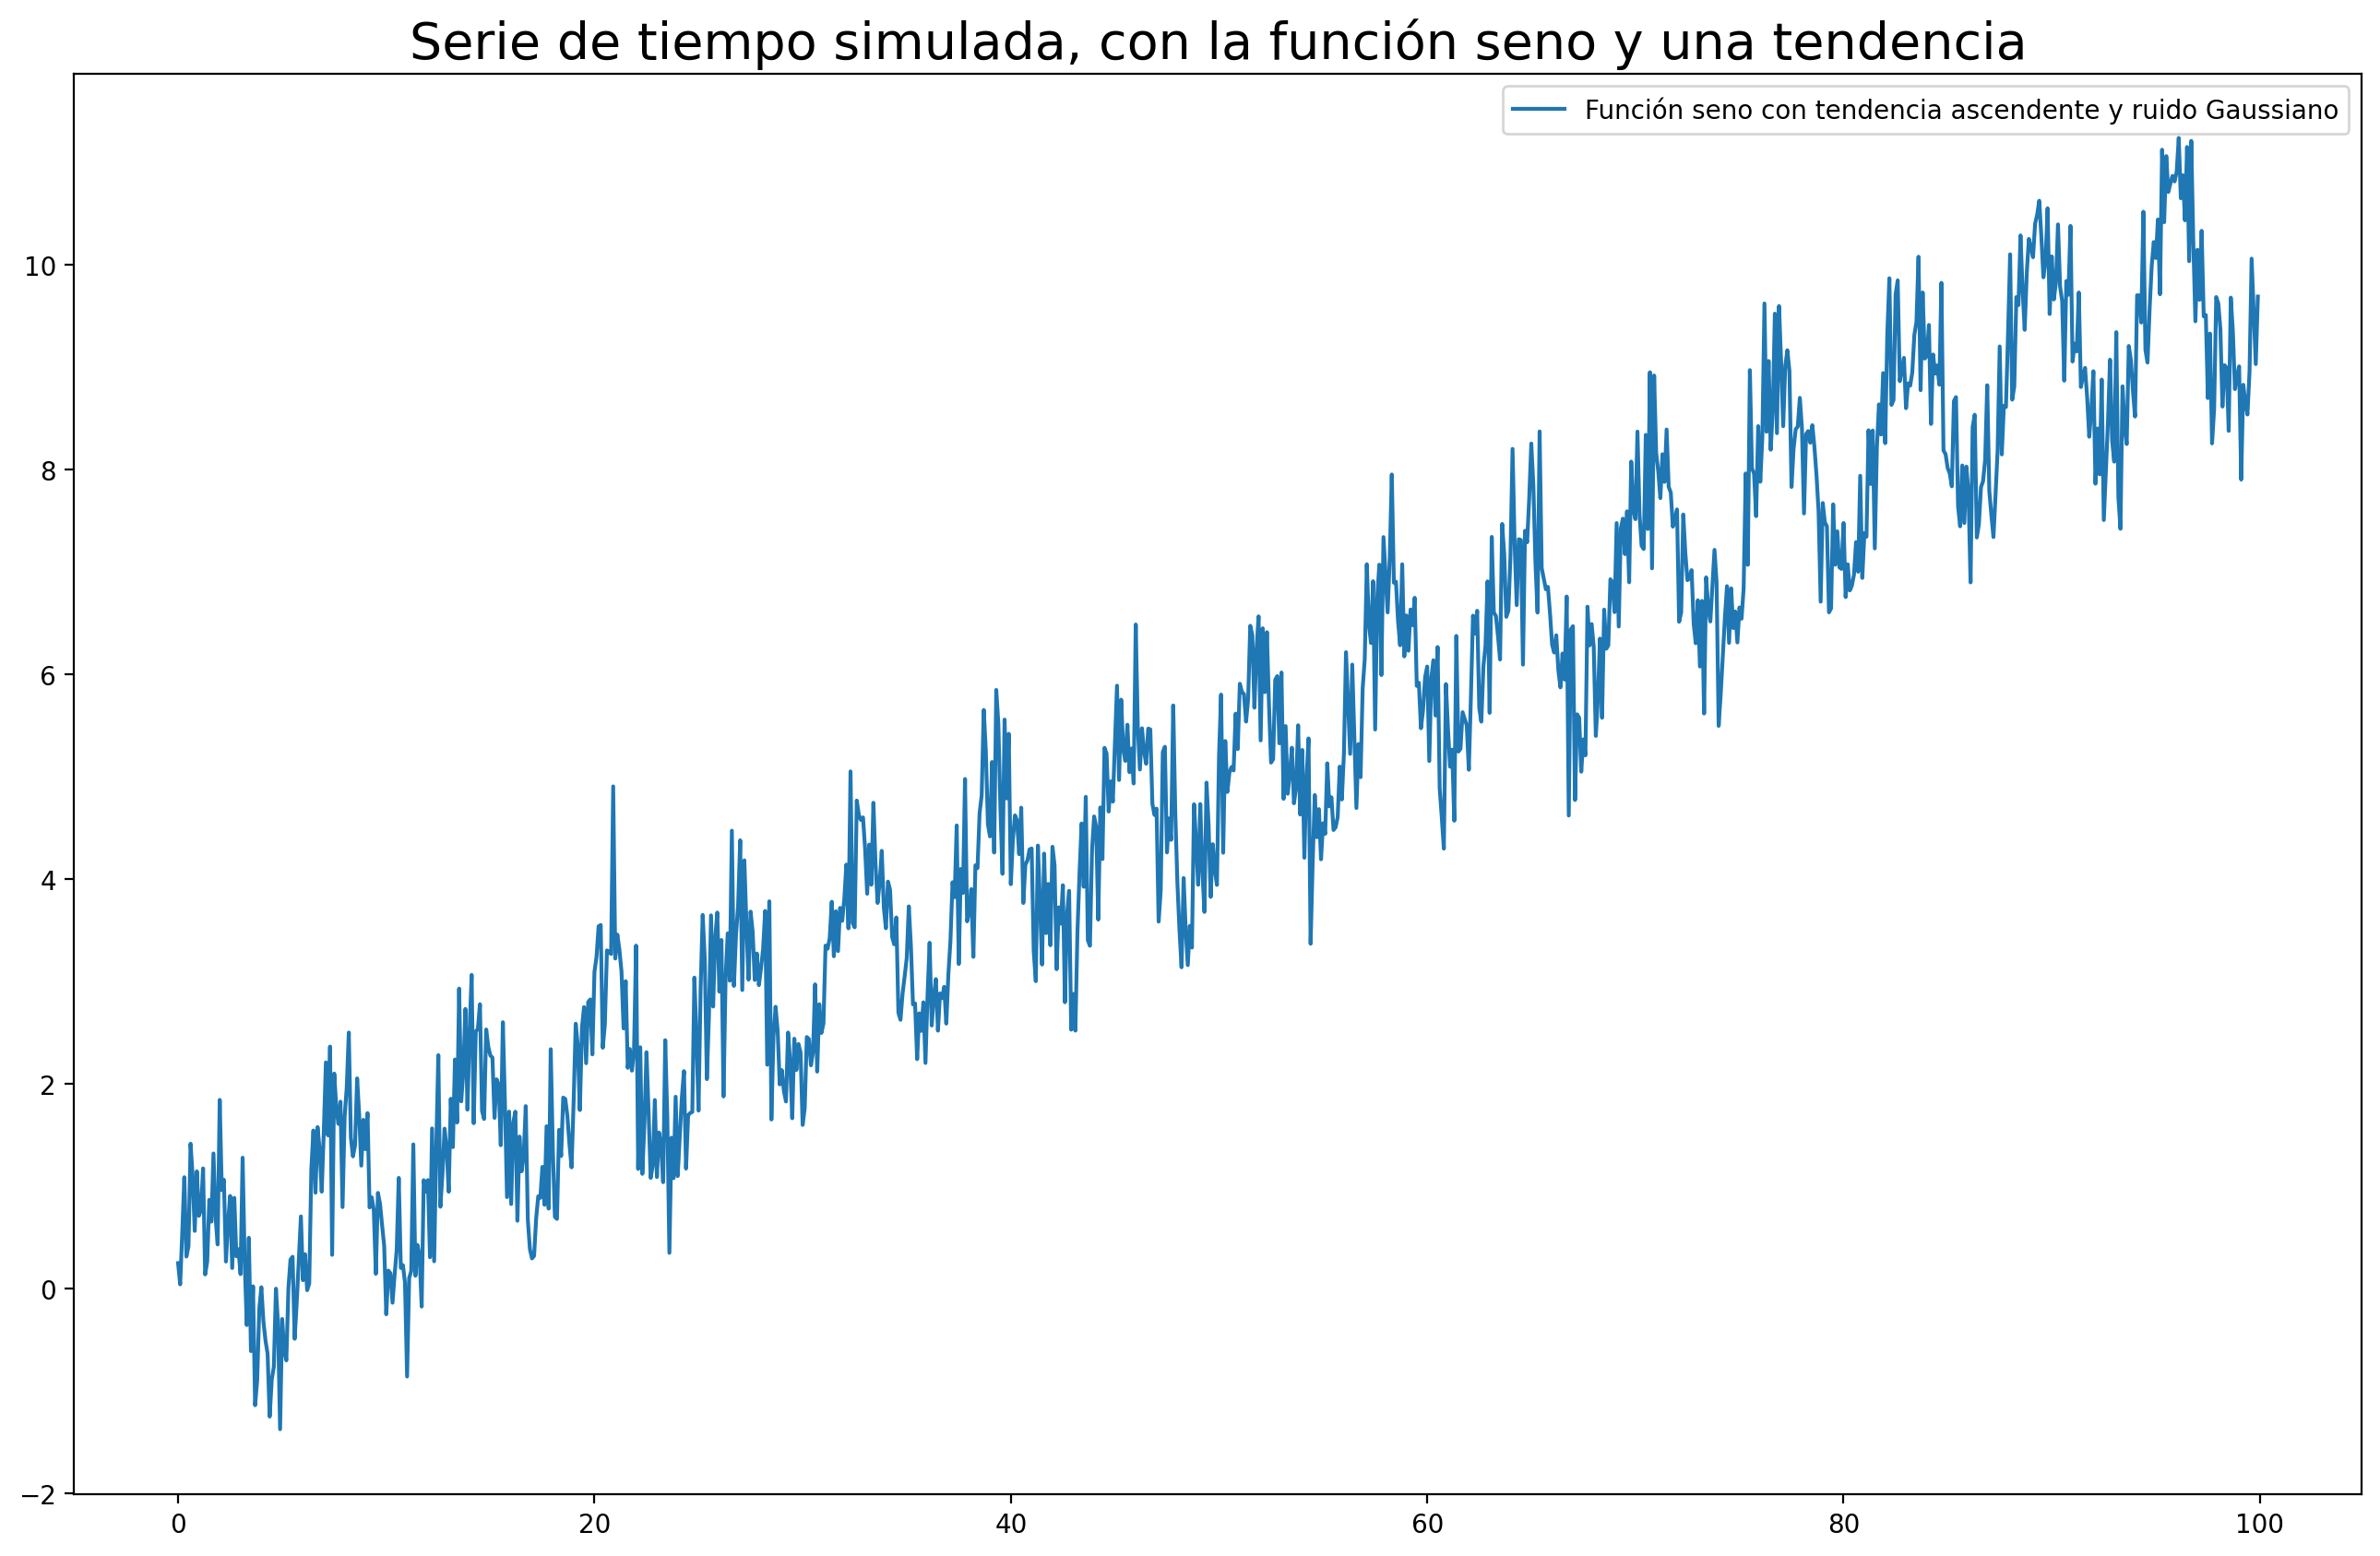

In [5]:
plt.plot(time, sin, label='Función seno con tendencia ascendente y ruido Gaussiano');
plt.title("Serie de tiempo simulada, con la función seno y una tendencia", size = 20)
plt.legend();
plt.show()

In [6]:
print( 'Número de datos: ', sin.shape[0])

Número de datos:  1000


## <span style="color:blue">Preprocesamiento de los datos</span> 

### <span style="color:#4CC9F0">Escala los datos</span>

Introducimos un instancia de clase del escalador *MinMaxScaler* para llevar los datos a la escala $[0,1]$

In [7]:
#crea un dataset 
#
df1 = pd.DataFrame(sin, index=time, columns=['serie'])
# crea el objeto  scaler y escala los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df1.values)
#
dataset = pd.DataFrame(scaled_data,index=df1.index, columns=['serie'])
#

In [8]:
dataset.shape

(1000, 1)

### <span style="color:#4CC9F0">Gráfico de datos escalados</span>

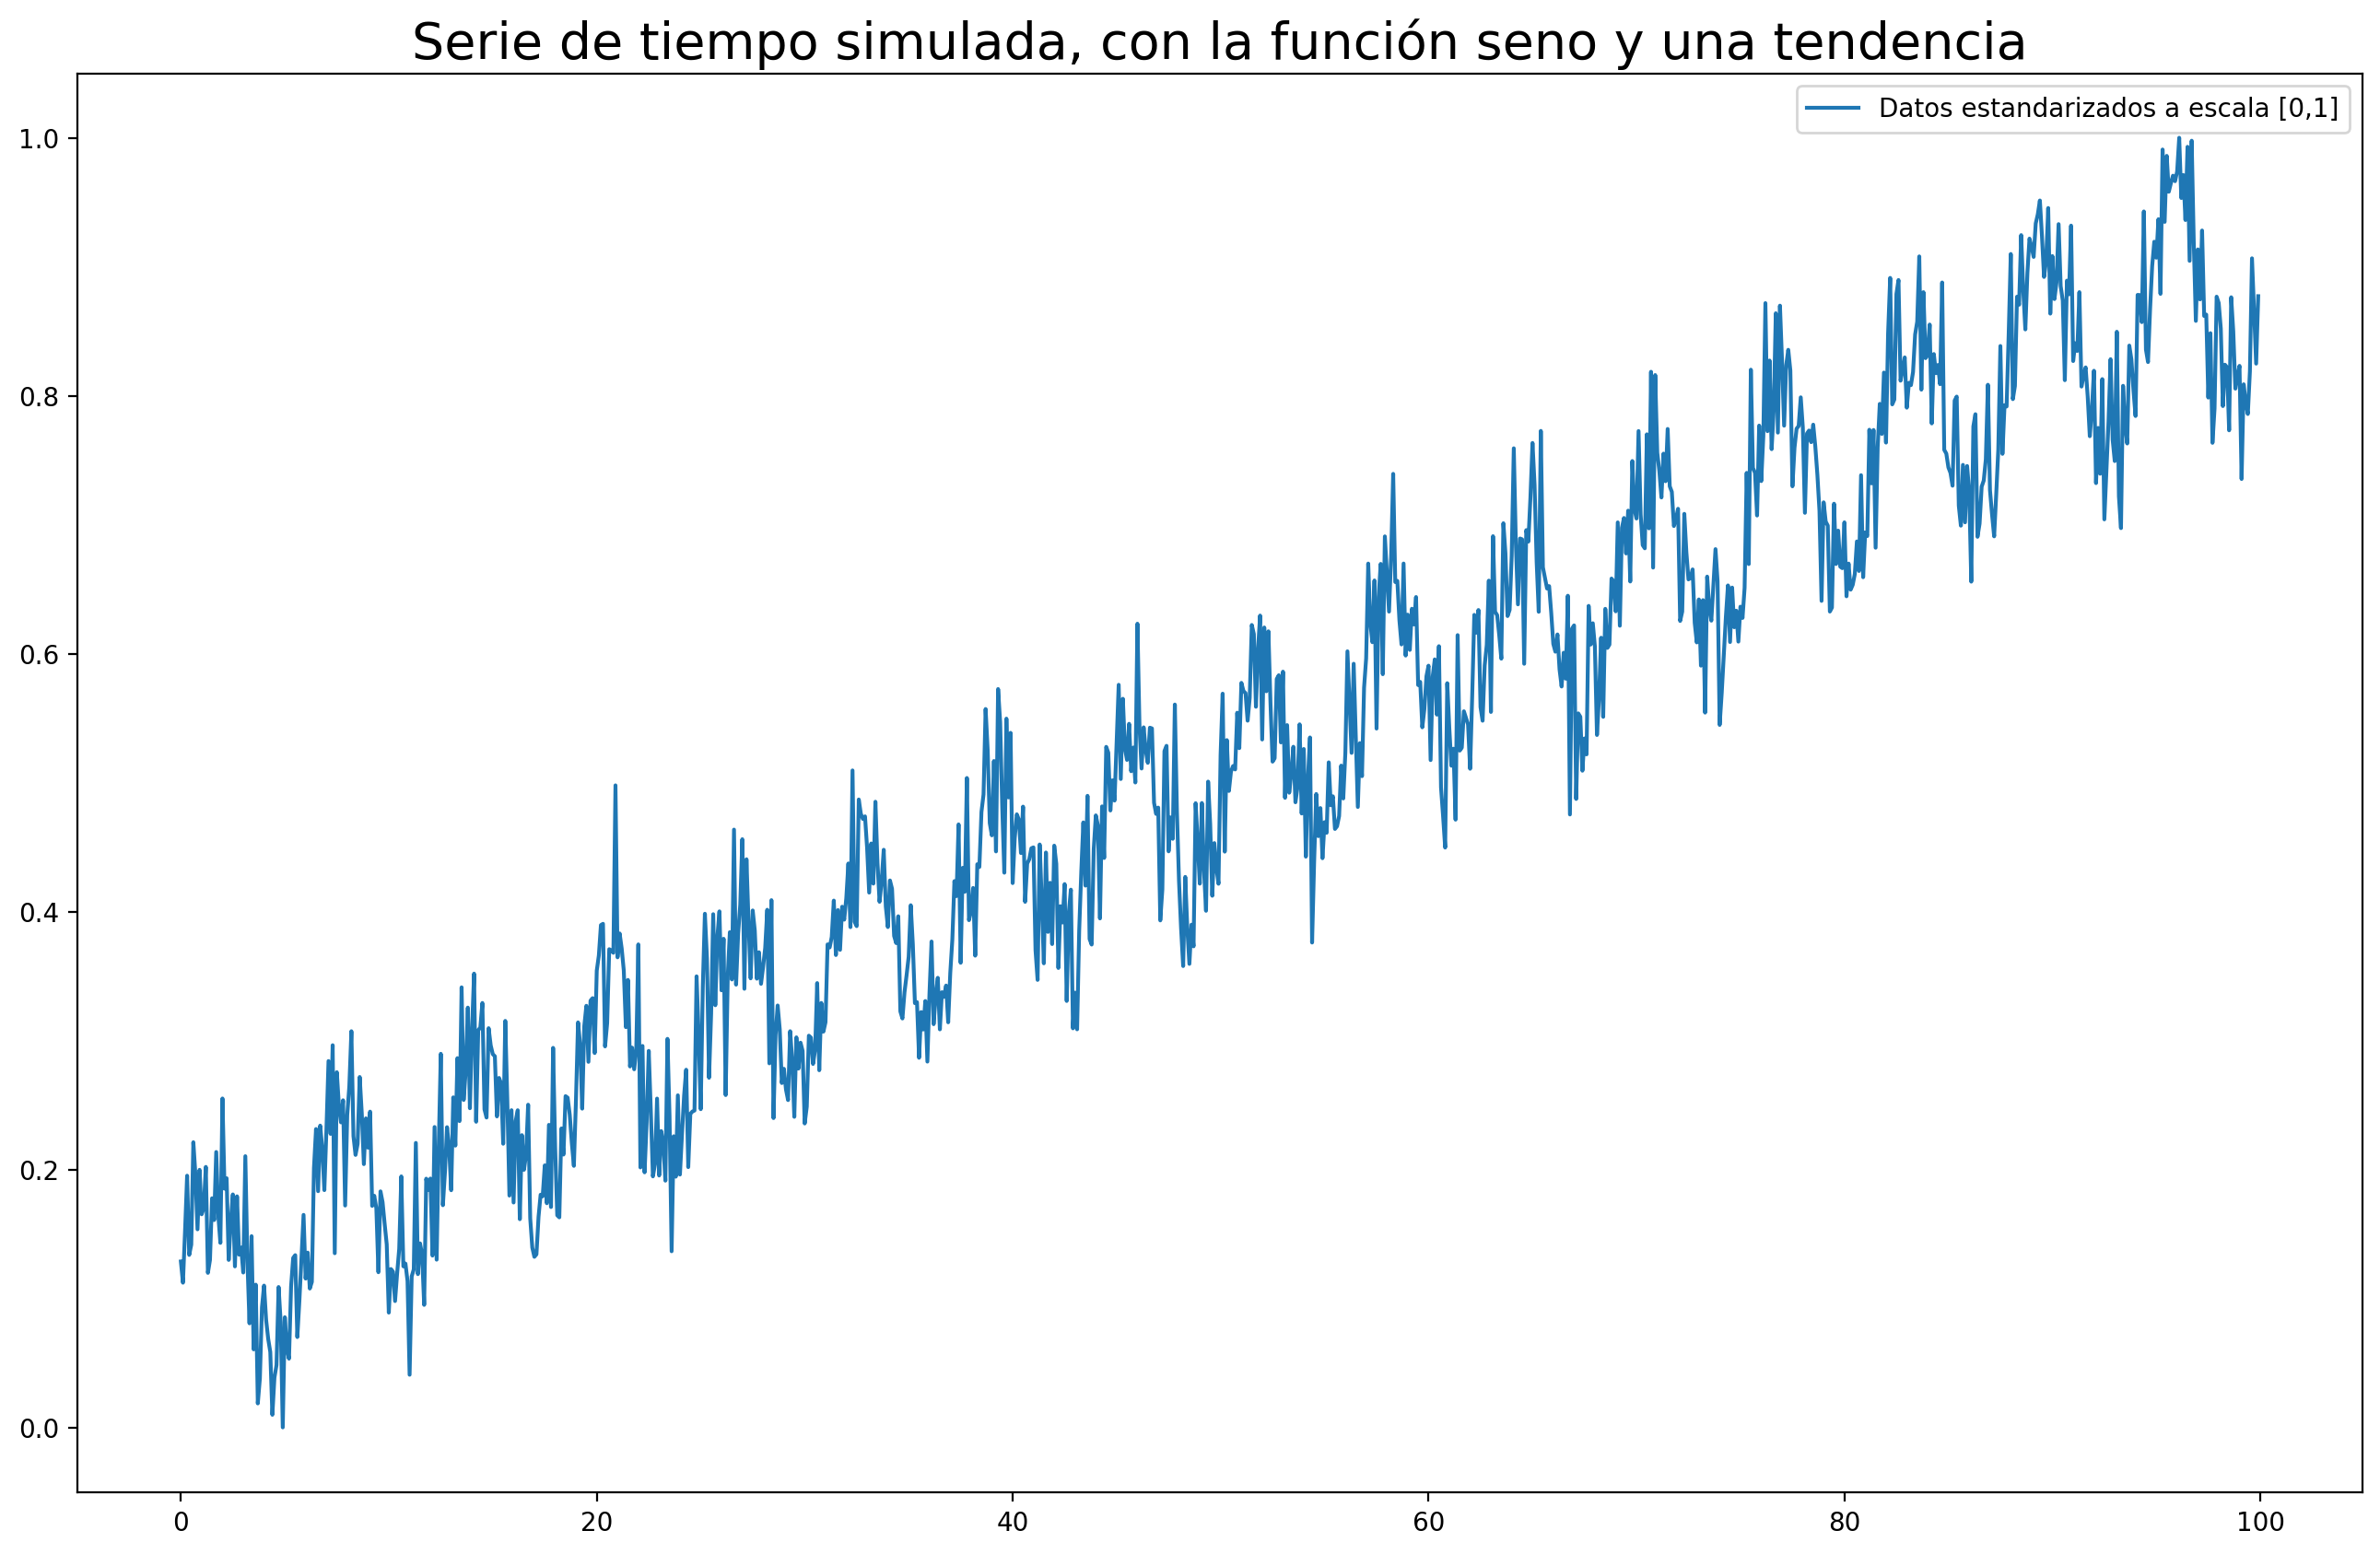

In [9]:
#serie_0_1 = dataset.serie_0_1.values

plt.plot(time, dataset, label='Datos estandarizados a escala [0,1]');
plt.title("Serie de tiempo simulada, con la función seno y una tendencia", size = 20)
plt.legend();
plt.show()

### <span style="color:#4CC9F0">Separación de datos entrenamiento y de validación</span>

En el caso de las series de tiempo, los datos de entrenamiento se toman desde el comienzo de la serie y los de validación desde el final hacia atras. 

Veamos.

In [10]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size], dataset.iloc[train_size:len(df1)]
len_train = len(train)
len_test = len(test)
print(len_train, len_test)

800 200


In [11]:
train.shape

(800, 1)

### <span style="color:#4CC9F0">Plot que muestra los datos de entrenamiento y los de validación</span>

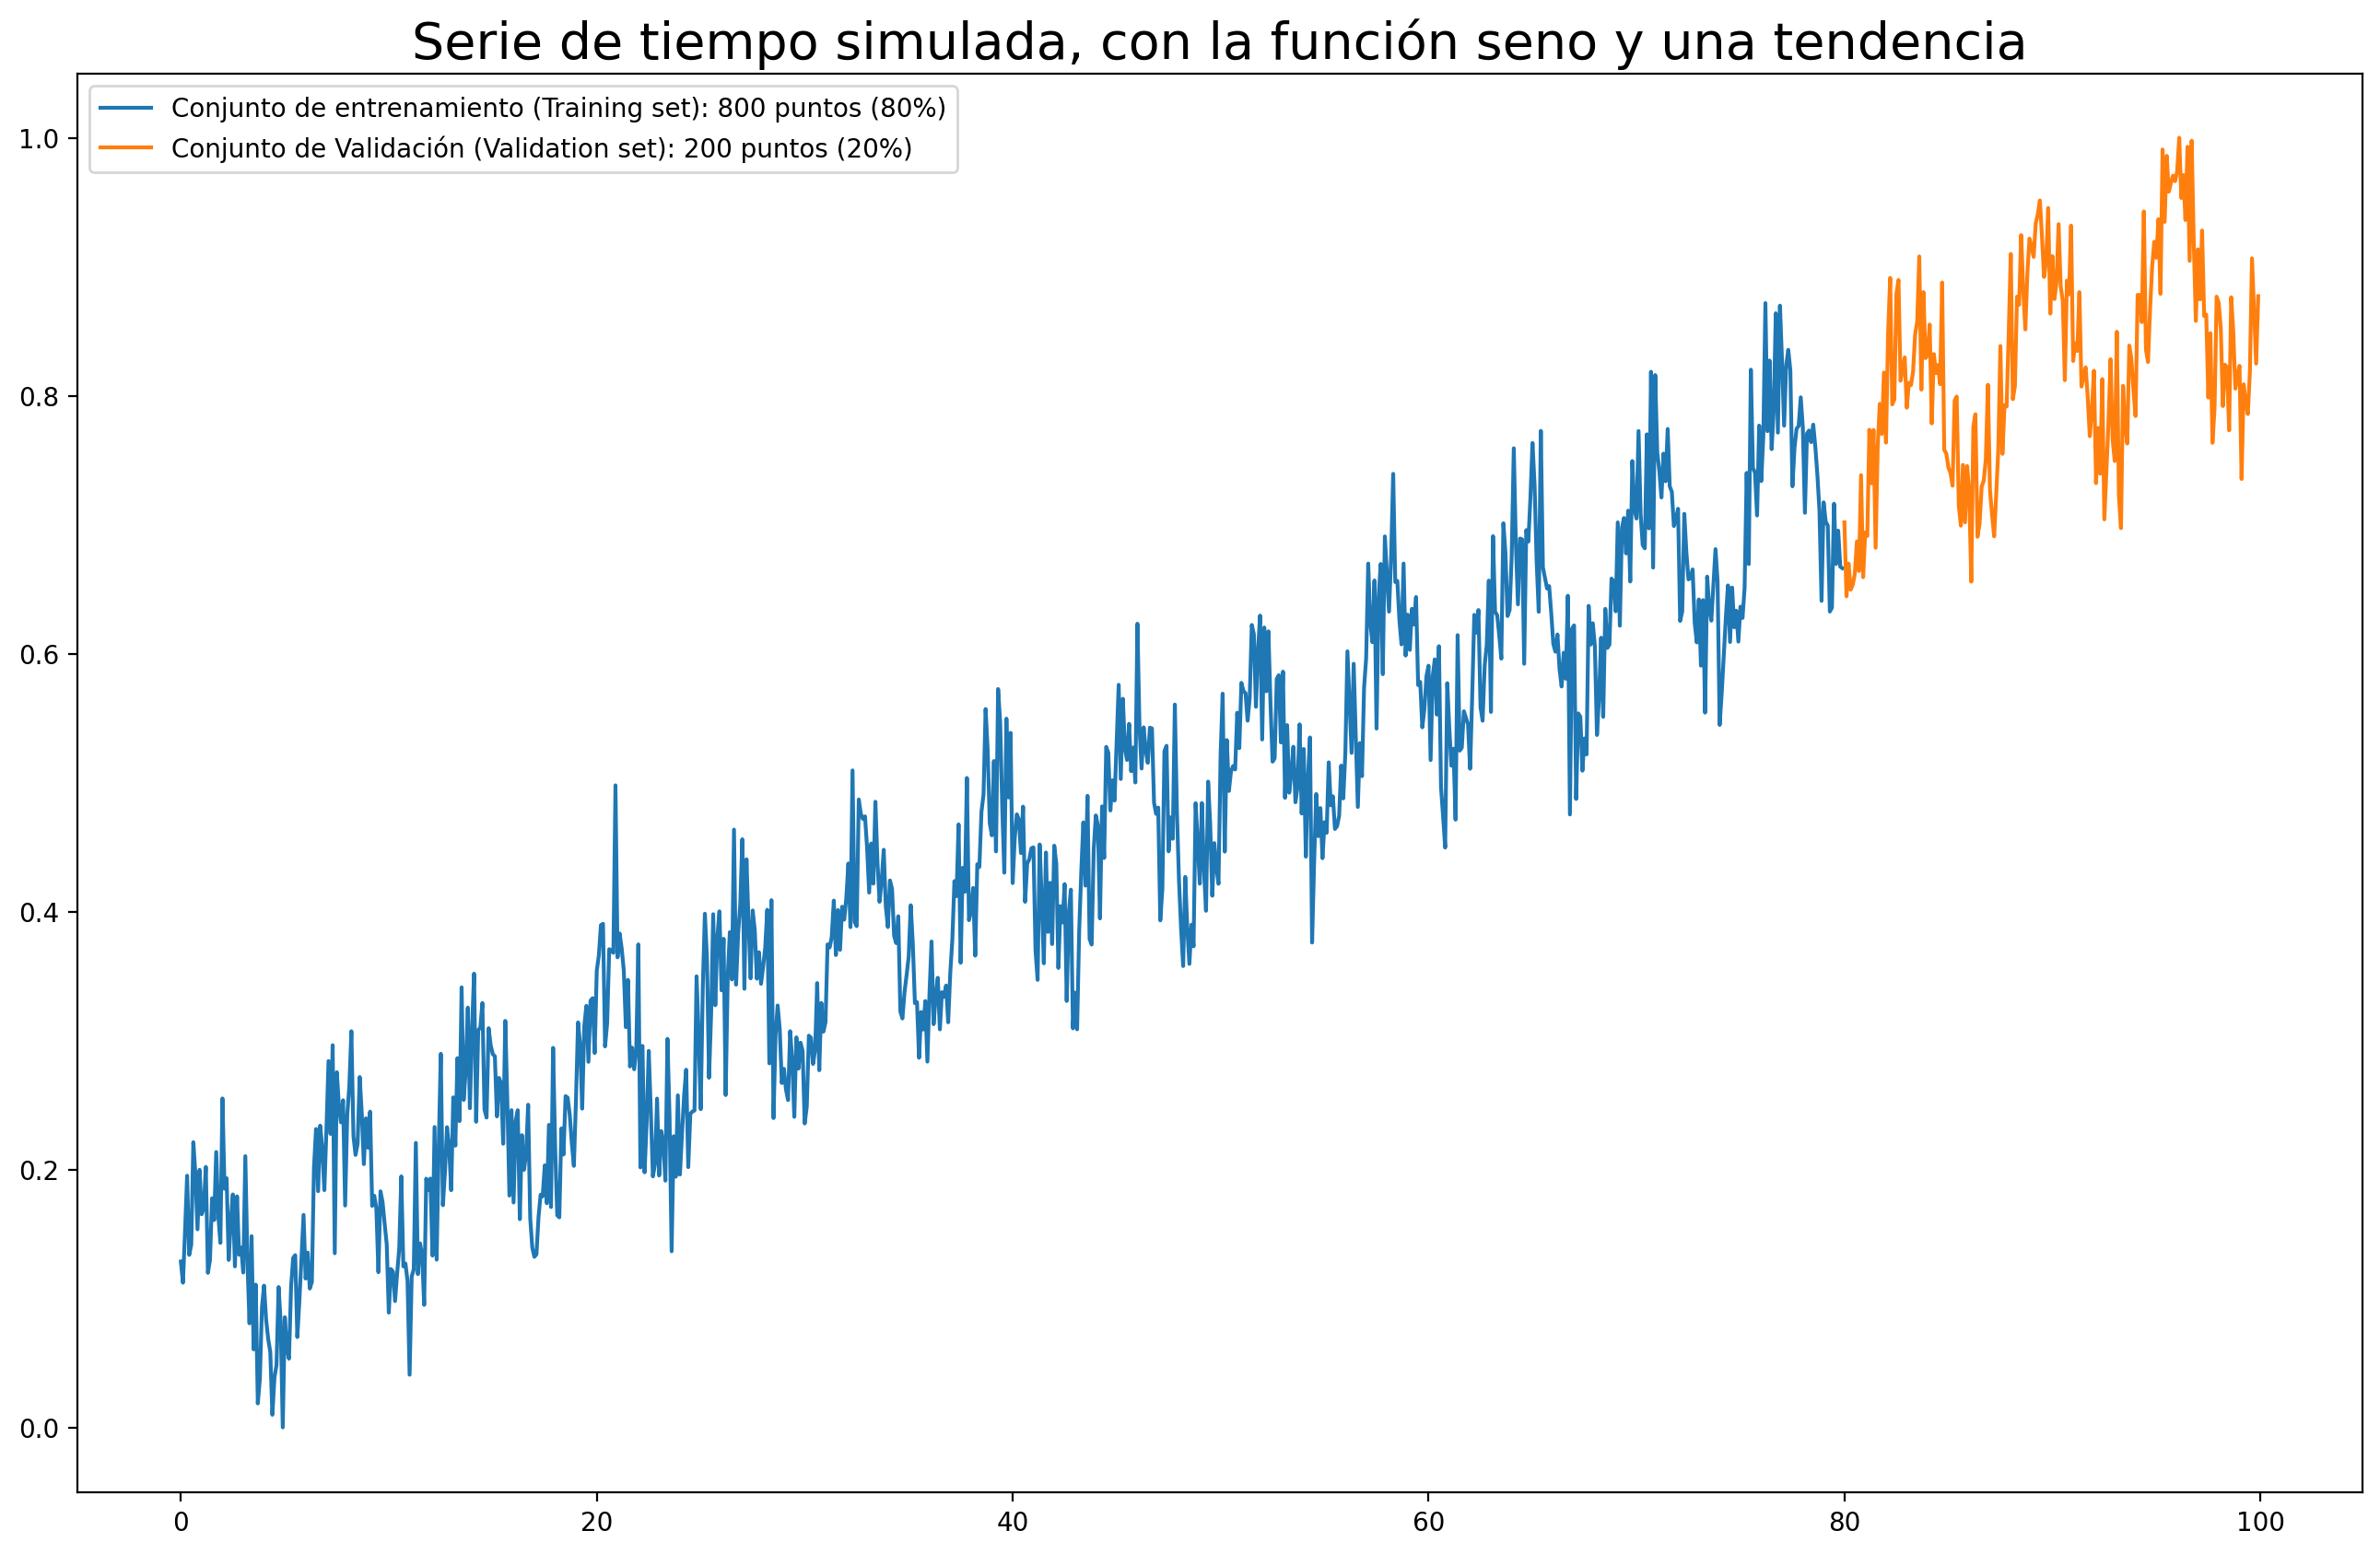

In [12]:
#plt.figure(figsize=(16,8))
plt.plot(train, label='Conjunto de entrenamiento (Training set): ' + str(len_train) +' puntos (80%)')
plt.plot(test, label='Conjunto de Validación (Validation set): '  + str(len_test) + ' puntos (20%)') 
plt.title("Serie de tiempo simulada, con la función seno y una tendencia", size = 20)
plt.legend()
plt.show()

Preparar los datos para la predicción de series temporales (LSTM en particular) puede ser complicado.

Intuitivamente, necesitamos predecir el valor en el paso de tiempo actual utilizando el historial ($n$ pasos de tiempo hacia atrás a partir de él). 


Aquí se propone una función genérica que hace el trabajo

In [13]:
def create_dataset(X, y, time_steps=1):
    # crea dos listas vacias para depositar los datos
    Xs, ys = [], []
    # el primer lote de datos empieza en la primera observación
    # y toma time_steps  datos.
    # Comienza a avanzar hacia adelante.
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

La belleza de esta función es que trabaja con datos de series temporales univariadas (función única) y multivariadas (funciones múltiples). Usemos un historial de 50 pasos de tiempo para hacer nuestras secuencias. Esto significa que vamos a conservar la historia de 50 pasos atrás para predecir el valor actual.

In [15]:
time_steps = 50

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train, time_steps)
X_test, y_test = create_dataset(test, test, time_steps)

print(X_train.shape, y_train.shape)

print([X_train[0:1,], y_train[0:1]])

(750, 50, 1) (750, 1)
[array([[[0.12866229],
        [0.1121937 ],
        [0.15199099],
        [0.19517542],
        [0.13373672],
        [0.14166865],
        [0.2211258 ],
        [0.19603986],
        [0.15358548],
        [0.19974127],
        [0.16525499],
        [0.16990083],
        [0.20199465],
        [0.11982438],
        [0.12982285],
        [0.17767362],
        [0.16076588],
        [0.21355511],
        [0.16446774],
        [0.14307962],
        [0.25505916],
        [0.1851261 ],
        [0.19321062],
        [0.12984983],
        [0.15998183],
        [0.18065415],
        [0.12482759],
        [0.17917075],
        [0.13392128],
        [0.13937234],
        [0.12008995],
        [0.21029807],
        [0.12917938],
        [0.0806848 ],
        [0.14828083],
        [0.0604929 ],
        [0.11070353],
        [0.01858177],
        [0.03791053],
        [0.09315708],
        [0.10995165],
        [0.08338189],
        [0.06856677],
        [0.05846956],
        [

In [26]:
print(X_train.shape)
print(y_train.shape)

(750, 50, 1)
(750, 1)


## <span style="color:blue">Modelo LSTM</span>


Entrenar un modelo LSTM en Keras es fácil. Utilizaremos la capa LSTM en un modelo secuencial para hacer nuestras predicciones:

### <span style="color:#4CC9F0">Crea el modelo</span>

In [17]:
# shapes
inputs_shape = (X_train.shape[1], X_train.shape[2])
lstm_output = 60

# layers
inputs = Input(inputs_shape)
x = LSTM(units=lstm_output, name='LSTM_layer')(inputs)
outputs = Dense(1)(x)

# model
serie_0_1_model = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')


In [18]:
inputs_shape

(50, 1)

### <span style="color:#4CC9F0">Summary del modelo</span>

In [25]:
#model = keras.Sequential()
#model.add(keras.layers.LSTM(units=lstm_output,  input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(keras.layers.Dense(units=1))
serie_0_1_model.summary()

plot_model(serie_0_1_model, to_file='../Imagenes/series_LSTM_model.png', 
           show_shapes=True)

Model: "series_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 LSTM_layer (LSTM)           (None, 60)                14880     
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 14,941
Trainable params: 14,941
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Significa que el modelo tiene la primera de tipo LSTM capa con un input de tamaño $(50,1)$ y una salida de 60 neuronas.

La segunda es una capa densa con entrada 60 neuronas y salida una neurona


El cálculo del número de neuronas es como sigue: 

$$
\text{Número de parámetros capa LSTM } = 4(p^2+ pn +p)
$$

en donde $p$ es el tamaño de salida y $n$ el tamaño de entrada.

In [20]:
lstm_output =60
input_size =1 # input size in the LSTM machine
#
# cada entrada de tamaño 50 es mostrada a la máquina  LSTM machine uno por uno.
# luego se tiene
#
num_params = 4*(lstm_output*lstm_output + lstm_output*input_size+ lstm_output)
num_params

14880

### <span style="color:#4CC9F0">Compila</span>

In [21]:
serie_0_1_model.compile(loss='mean_squared_error',
  optimizer=Adam(0.001)
)

## <span style="color:blue">Entrenamiento</span>

Lo más importante para recordar al entrenar modelos de series temporales es no mezclar los datos (el orden de los datos es importante). El resto es bastante estándar:

In [22]:
history = serie_0_1_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=True
)

Epoch 1/30
22/22 [==============================] - 12s 141ms/step - loss: 0.0549 - val_loss: 0.0196
Epoch 2/30
22/22 [==============================] - 2s 85ms/step - loss: 0.0057 - val_loss: 0.0040
Epoch 3/30
22/22 [==============================] - 2s 81ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 4/30
22/22 [==============================] - 2s 85ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 5/30
22/22 [==============================] - 2s 92ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 6/30
22/22 [==============================] - 2s 100ms/step - loss: 0.0028 - val_loss: 0.0035
Epoch 7/30
22/22 [==============================] - 2s 86ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 8/30
22/22 [==============================] - 2s 85ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 9/30
22/22 [==============================] - 2s 84ms/step - loss: 0.0025 - val_loss: 0.0037
Epoch 10/30
22/22 [==============================] - 2s 93ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 

## <span style="color:blue">Evaluación del Modelo</span>

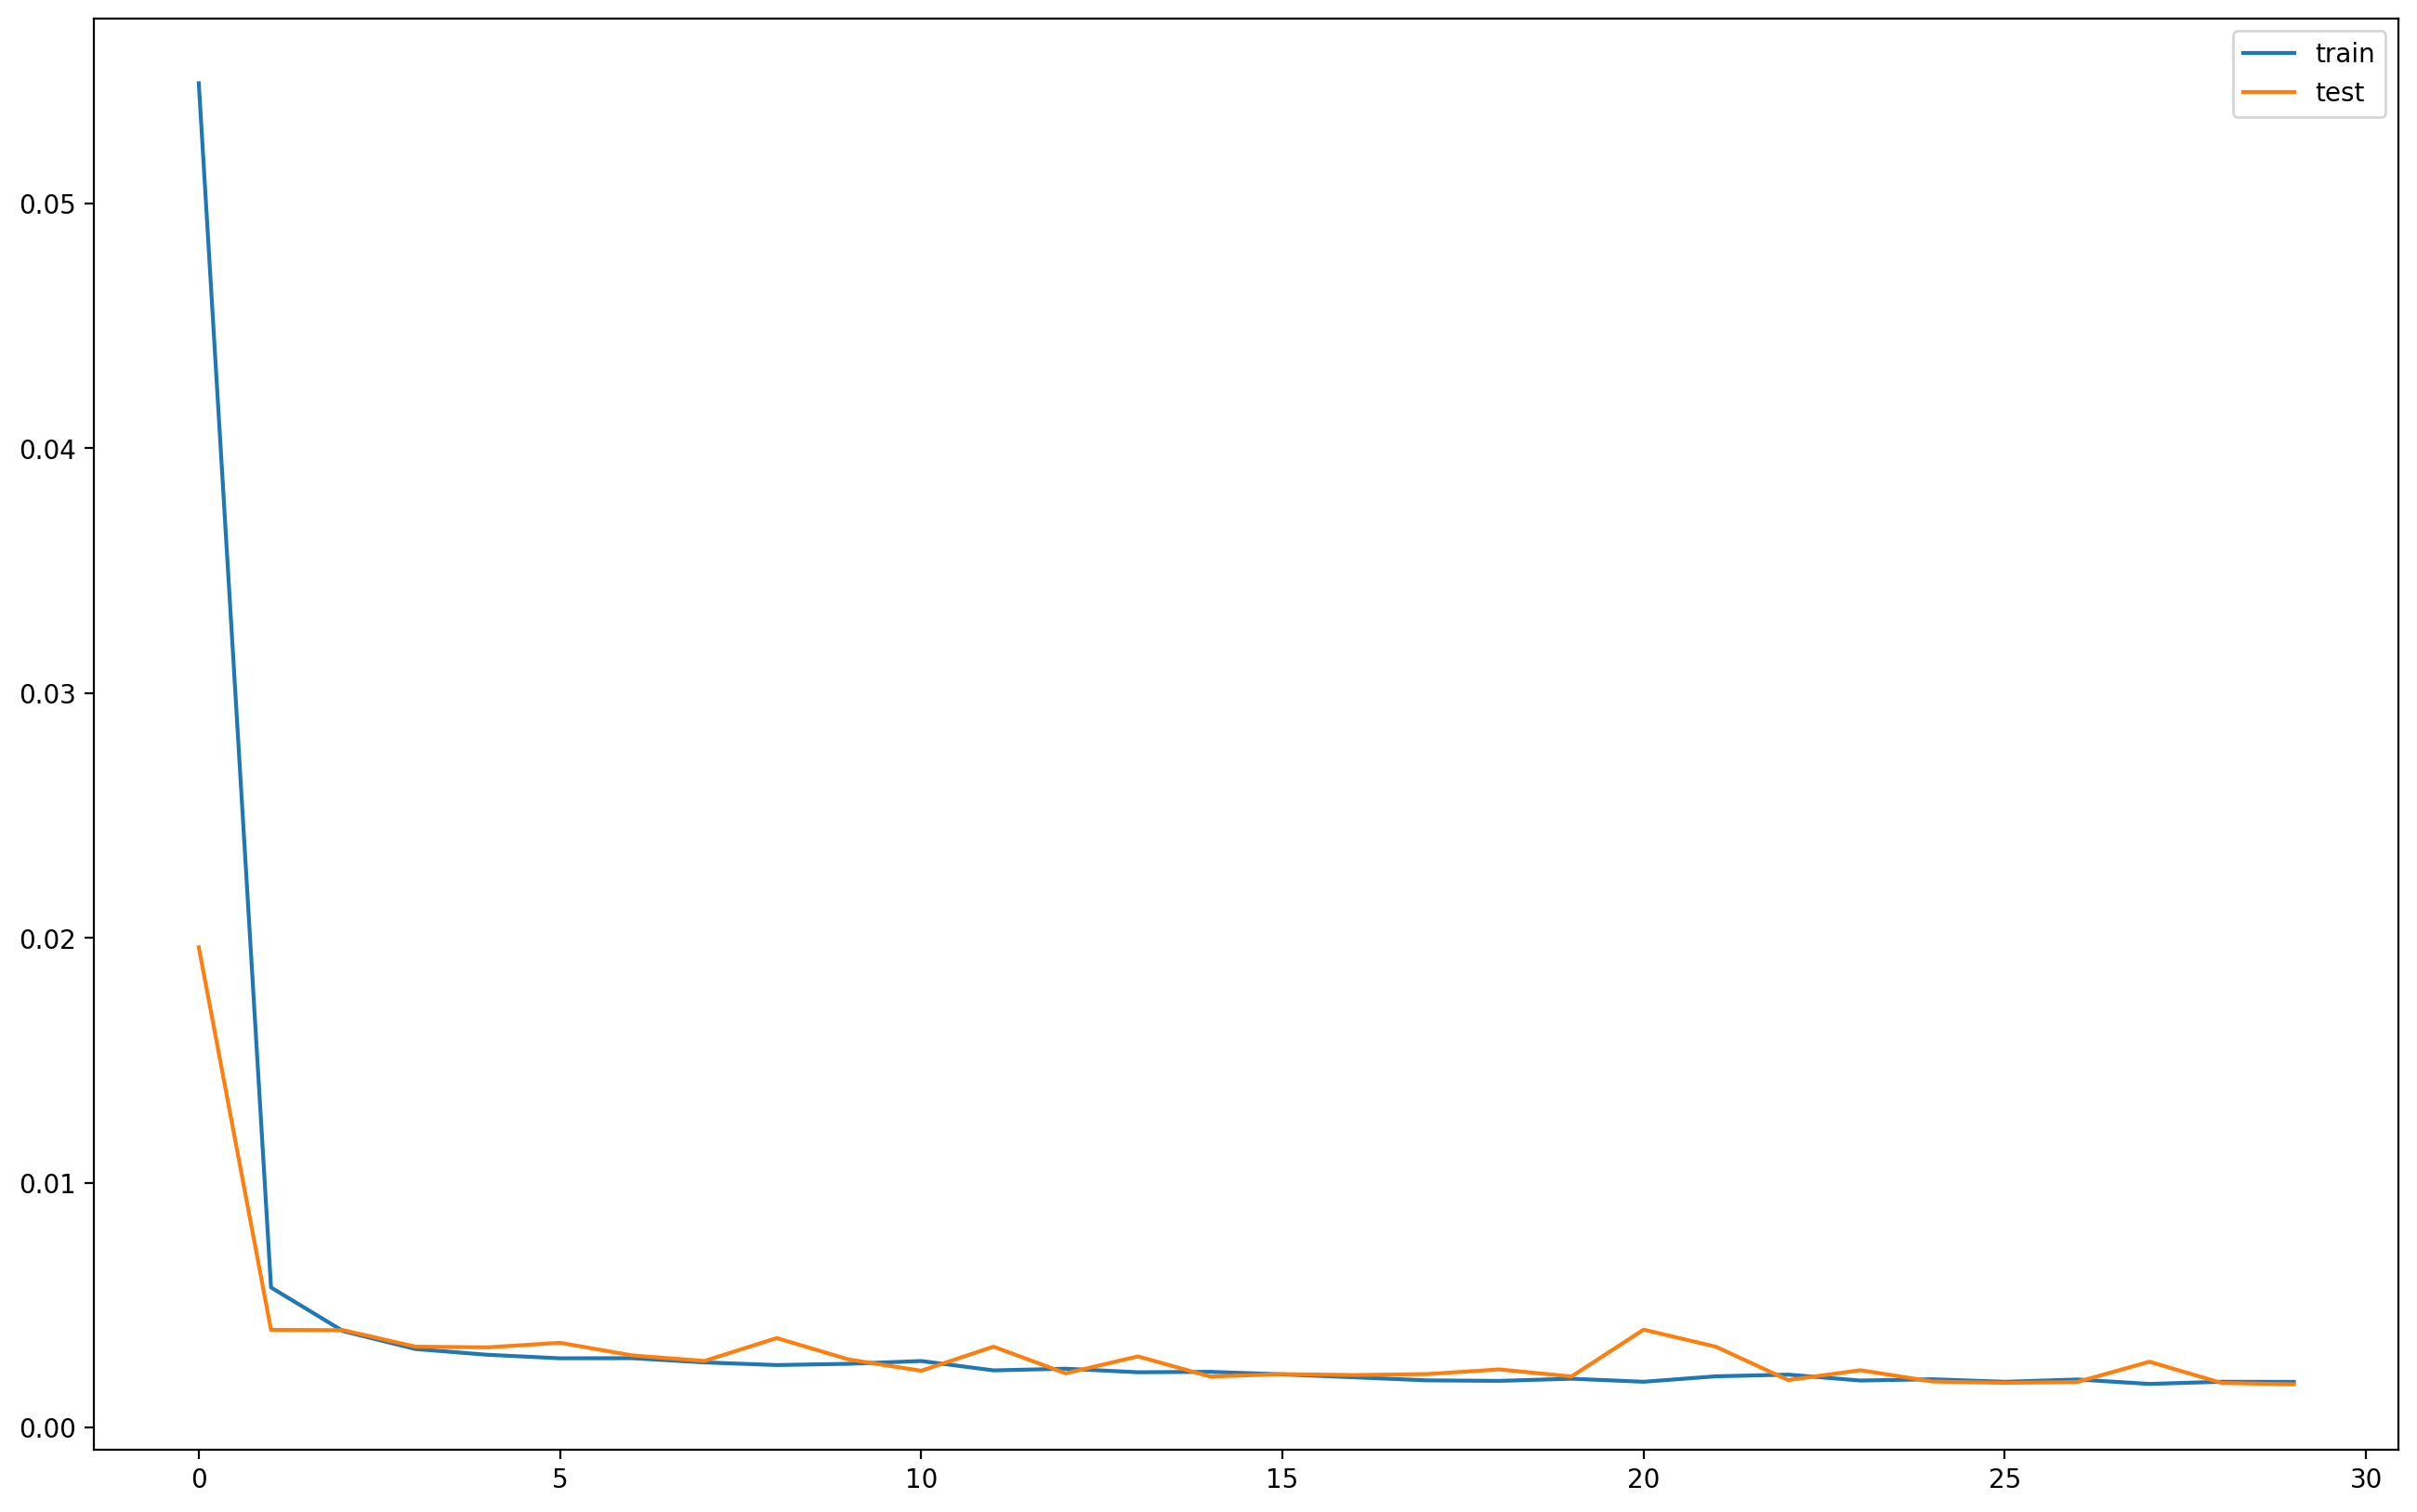

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

### <span style="color:#4CC9F0">Predicciones</span>

In [27]:
y_pred =serie_0_1_model.predict(X_test)

5/5 [==============================] - 1s 24ms/step


In [28]:
y_pred.shape

(150, 1)

### <span style="color:#4CC9F0">Serie completa</span>

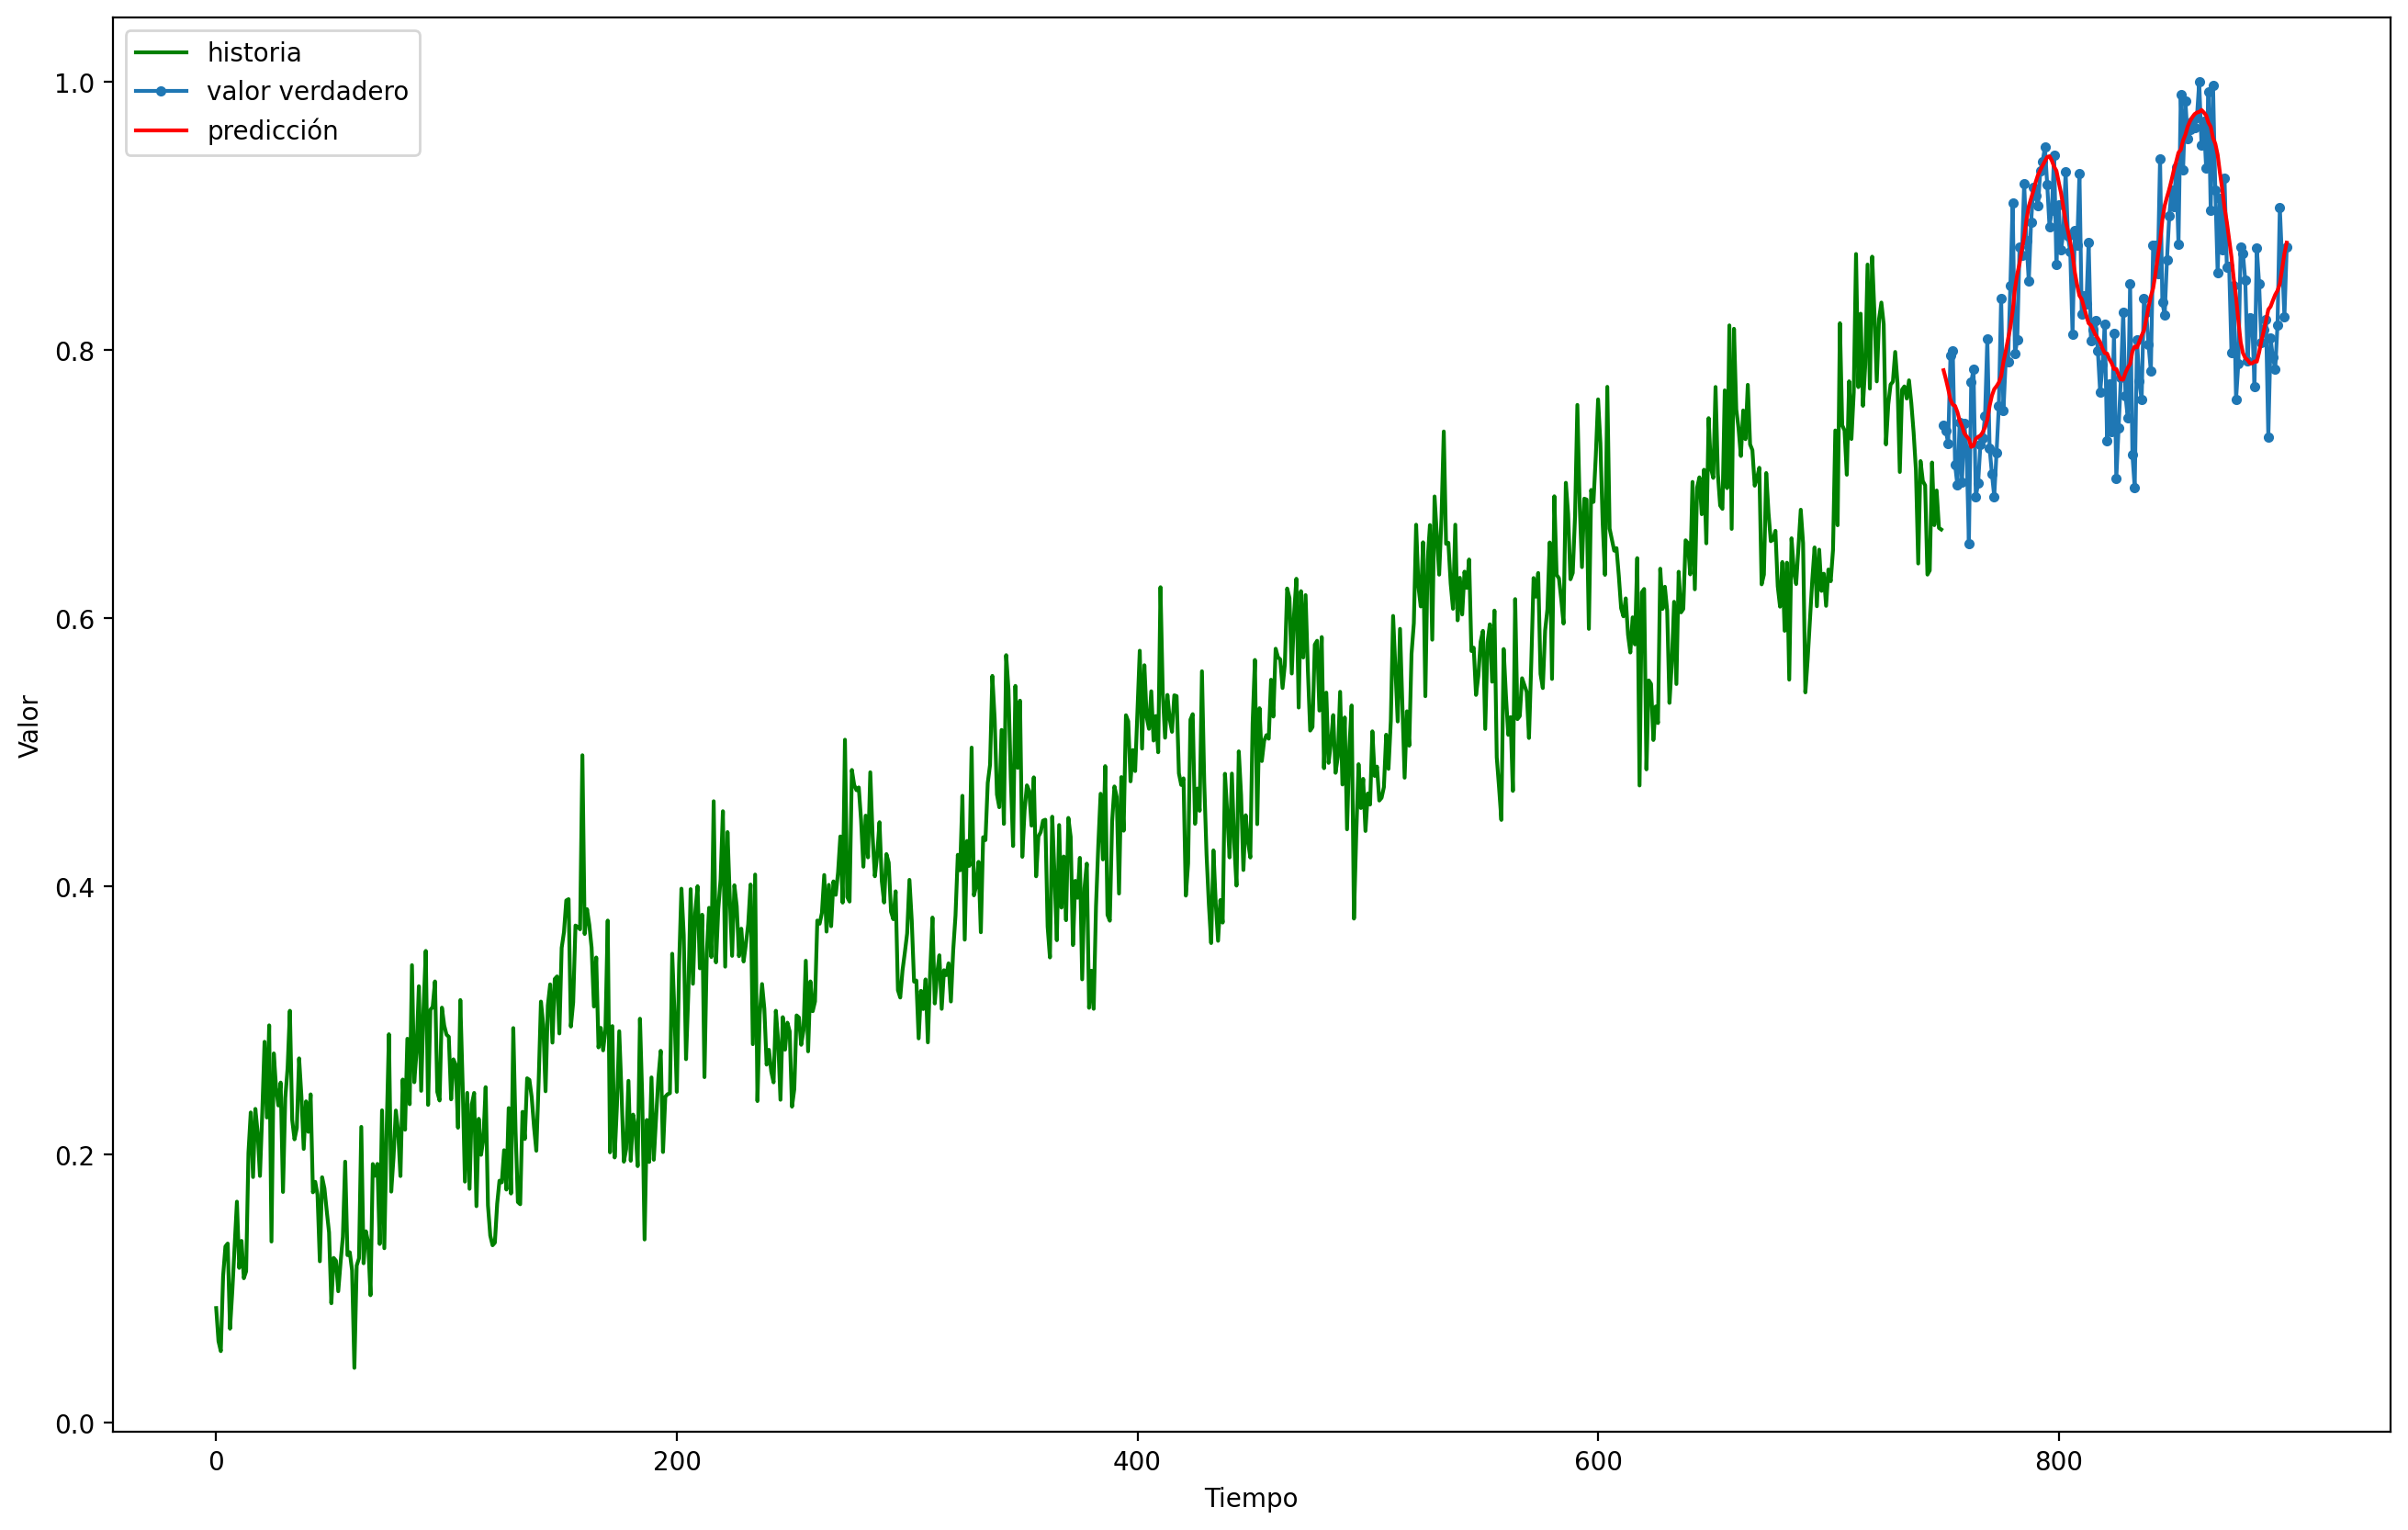

In [29]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="historia")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="valor verdadero")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="predicción")
plt.ylabel('Valor')
plt.xlabel('Tiempo')
plt.legend()
plt.show();

### <span style="color:#4CC9F0">Periodo de prueba (test)</span>

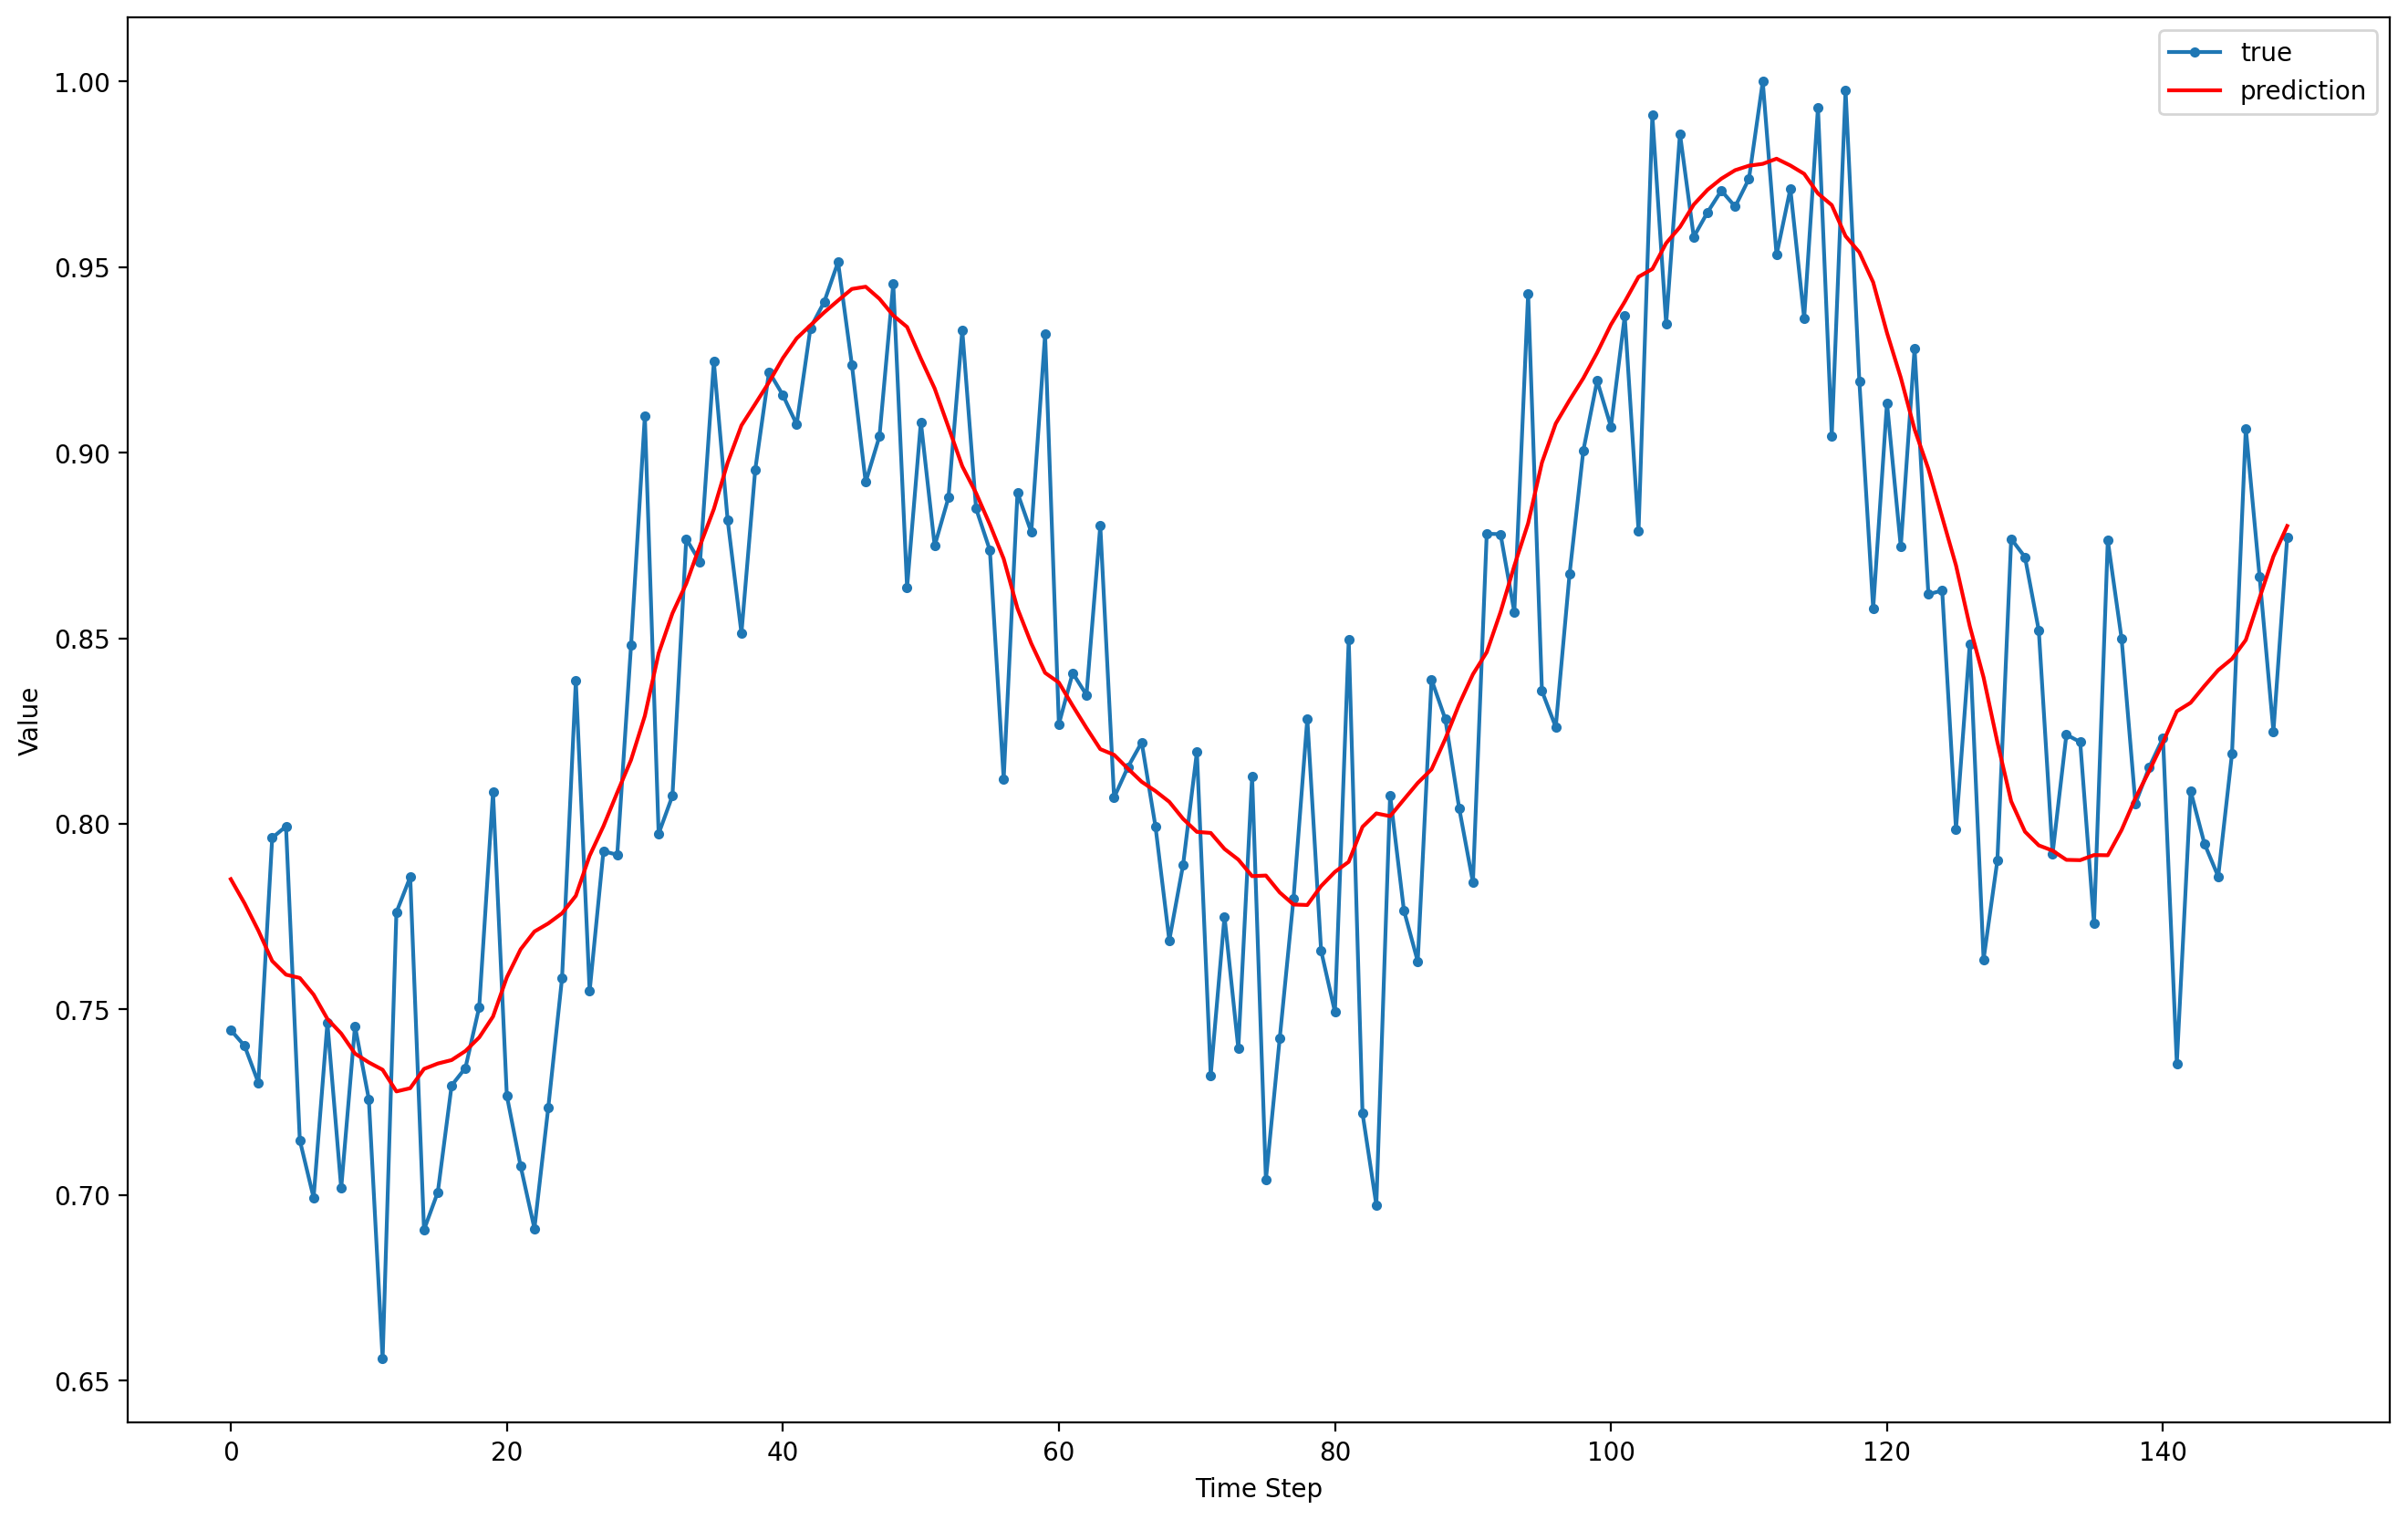

In [30]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();



## <span style="color:blue">Transforma a la escala original</span>

In [31]:
scaled_data = scaler.fit_transform(df1.values)
dataset = pd.DataFrame(scaled_data)
dataset.columns = ['sine']
dataset.index = df1.index

In [32]:
y_pred = scaler.inverse_transform(y_pred)


In [33]:
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [34]:
y_test.shape

(150, 1)

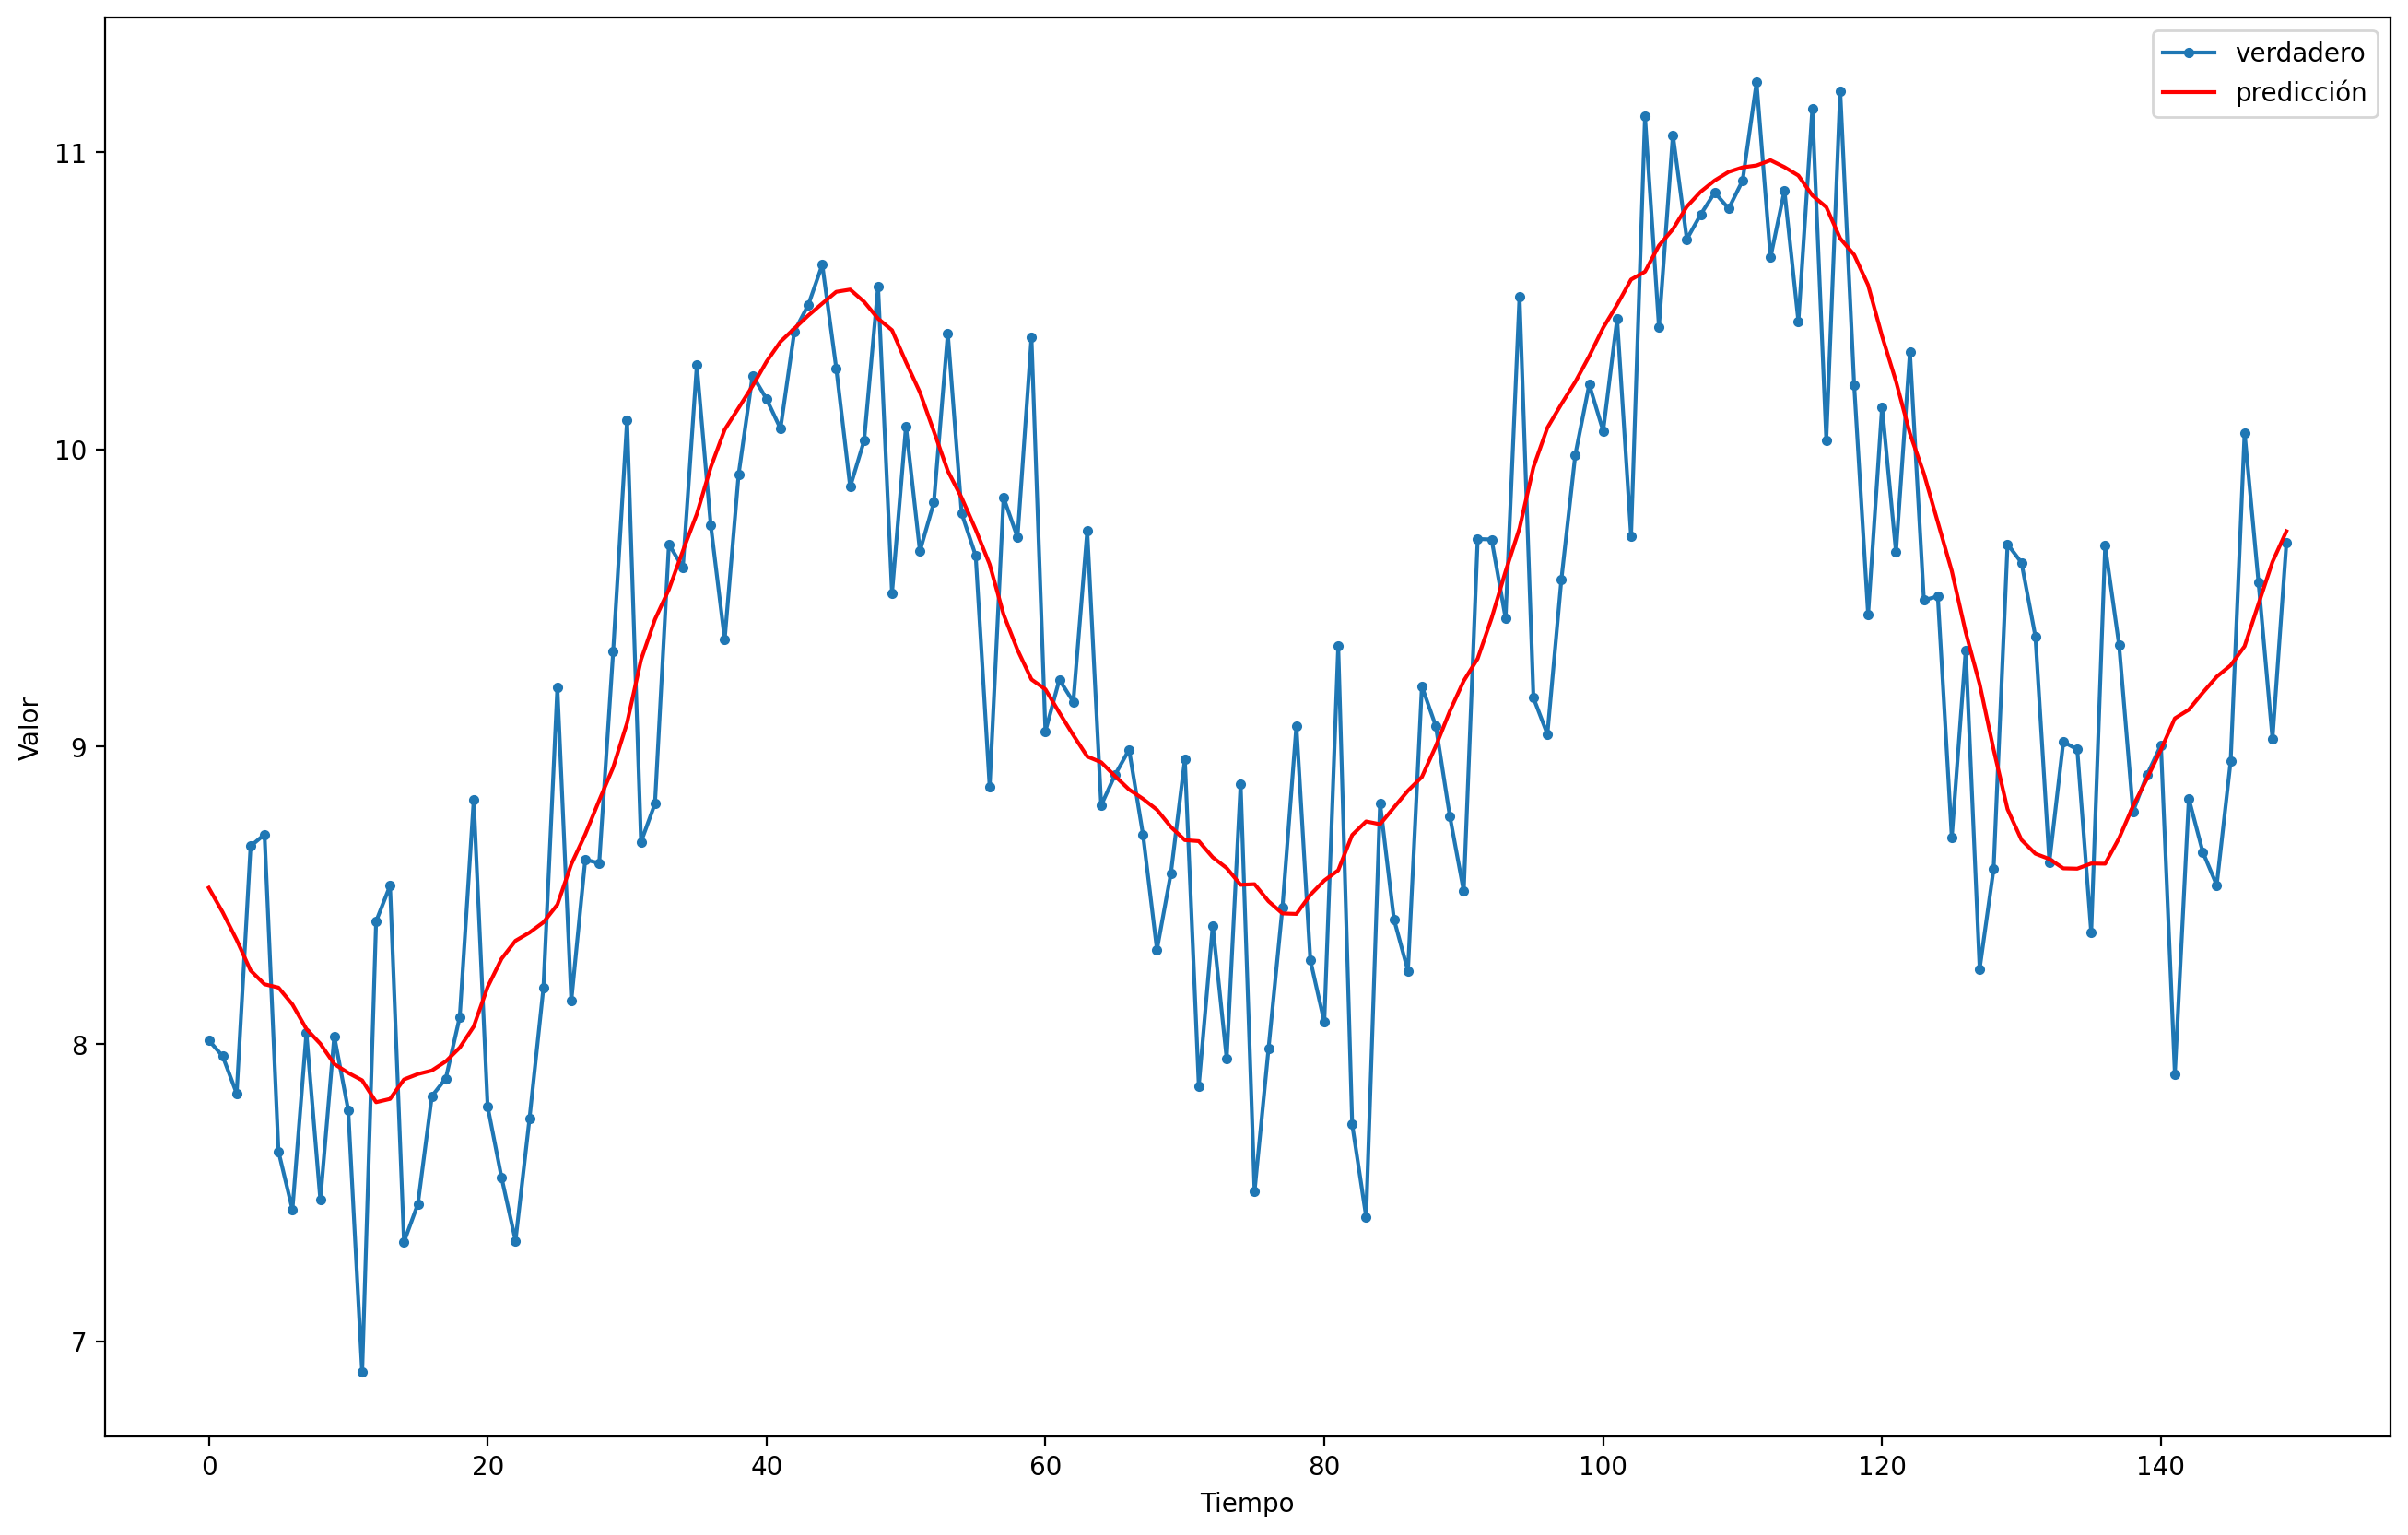

In [35]:
plt.plot(y_test, marker='.', label="verdadero")
plt.plot(y_pred, 'r', label="predicción")
plt.ylabel('Valor')
plt.xlabel('Tiempo')
plt.legend()
plt.show();

## <span style="color:blue">Modelo GRU</span>

In [36]:
# shapes
inputs_shape = (X_train.shape[1], X_train.shape[2])
lstm_output = 60

# layers
inputs = Input(inputs_shape)
x = GRU(units=lstm_output, name='GRU_layer')(inputs)
outputs = Dense(1)(x)

# model
serie_0_1_model_gru = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')

Model: "series_LSTM_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50, 1)]           0         
_________________________________________________________________
GRU_layer (GRU)              (None, 60)                11340     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


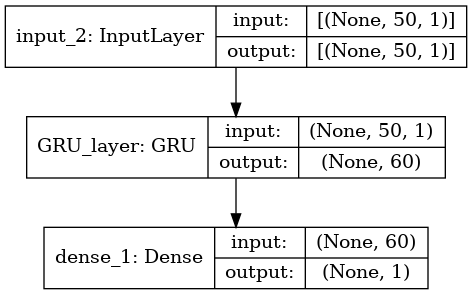

In [39]:
# summary
serie_0_1_model_gru.summary()

plot_model(serie_0_1_model_gru, to_file='../Imagenes/series_LSTM_model.png', 
           show_shapes=True)

In [37]:
# compila
serie_0_1_model_gru.compile(loss='mean_squared_error',
  optimizer=Adam(0.001)
)

In [38]:
# entrena
history = serie_0_1_model_gru.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/30
22/22 [==============================] - 8s 151ms/step - loss: 0.0196 - val_loss: 0.0044
Epoch 2/30
22/22 [==============================] - 2s 75ms/step - loss: 0.0188 - val_loss: 0.0100
Epoch 3/30
22/22 [==============================] - 2s 81ms/step - loss: 0.0085 - val_loss: 0.0058
Epoch 4/30
22/22 [==============================] - 2s 80ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 5/30
22/22 [==============================] - 2s 88ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 6/30
22/22 [==============================] - 2s 88ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 7/30
22/22 [==============================] - 2s 88ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 8/30
22/22 [==============================] - 2s 88ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 9/30
22/22 [==============================] - 2s 83ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 10/30
22/22 [==============================] - 2s 83ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 11

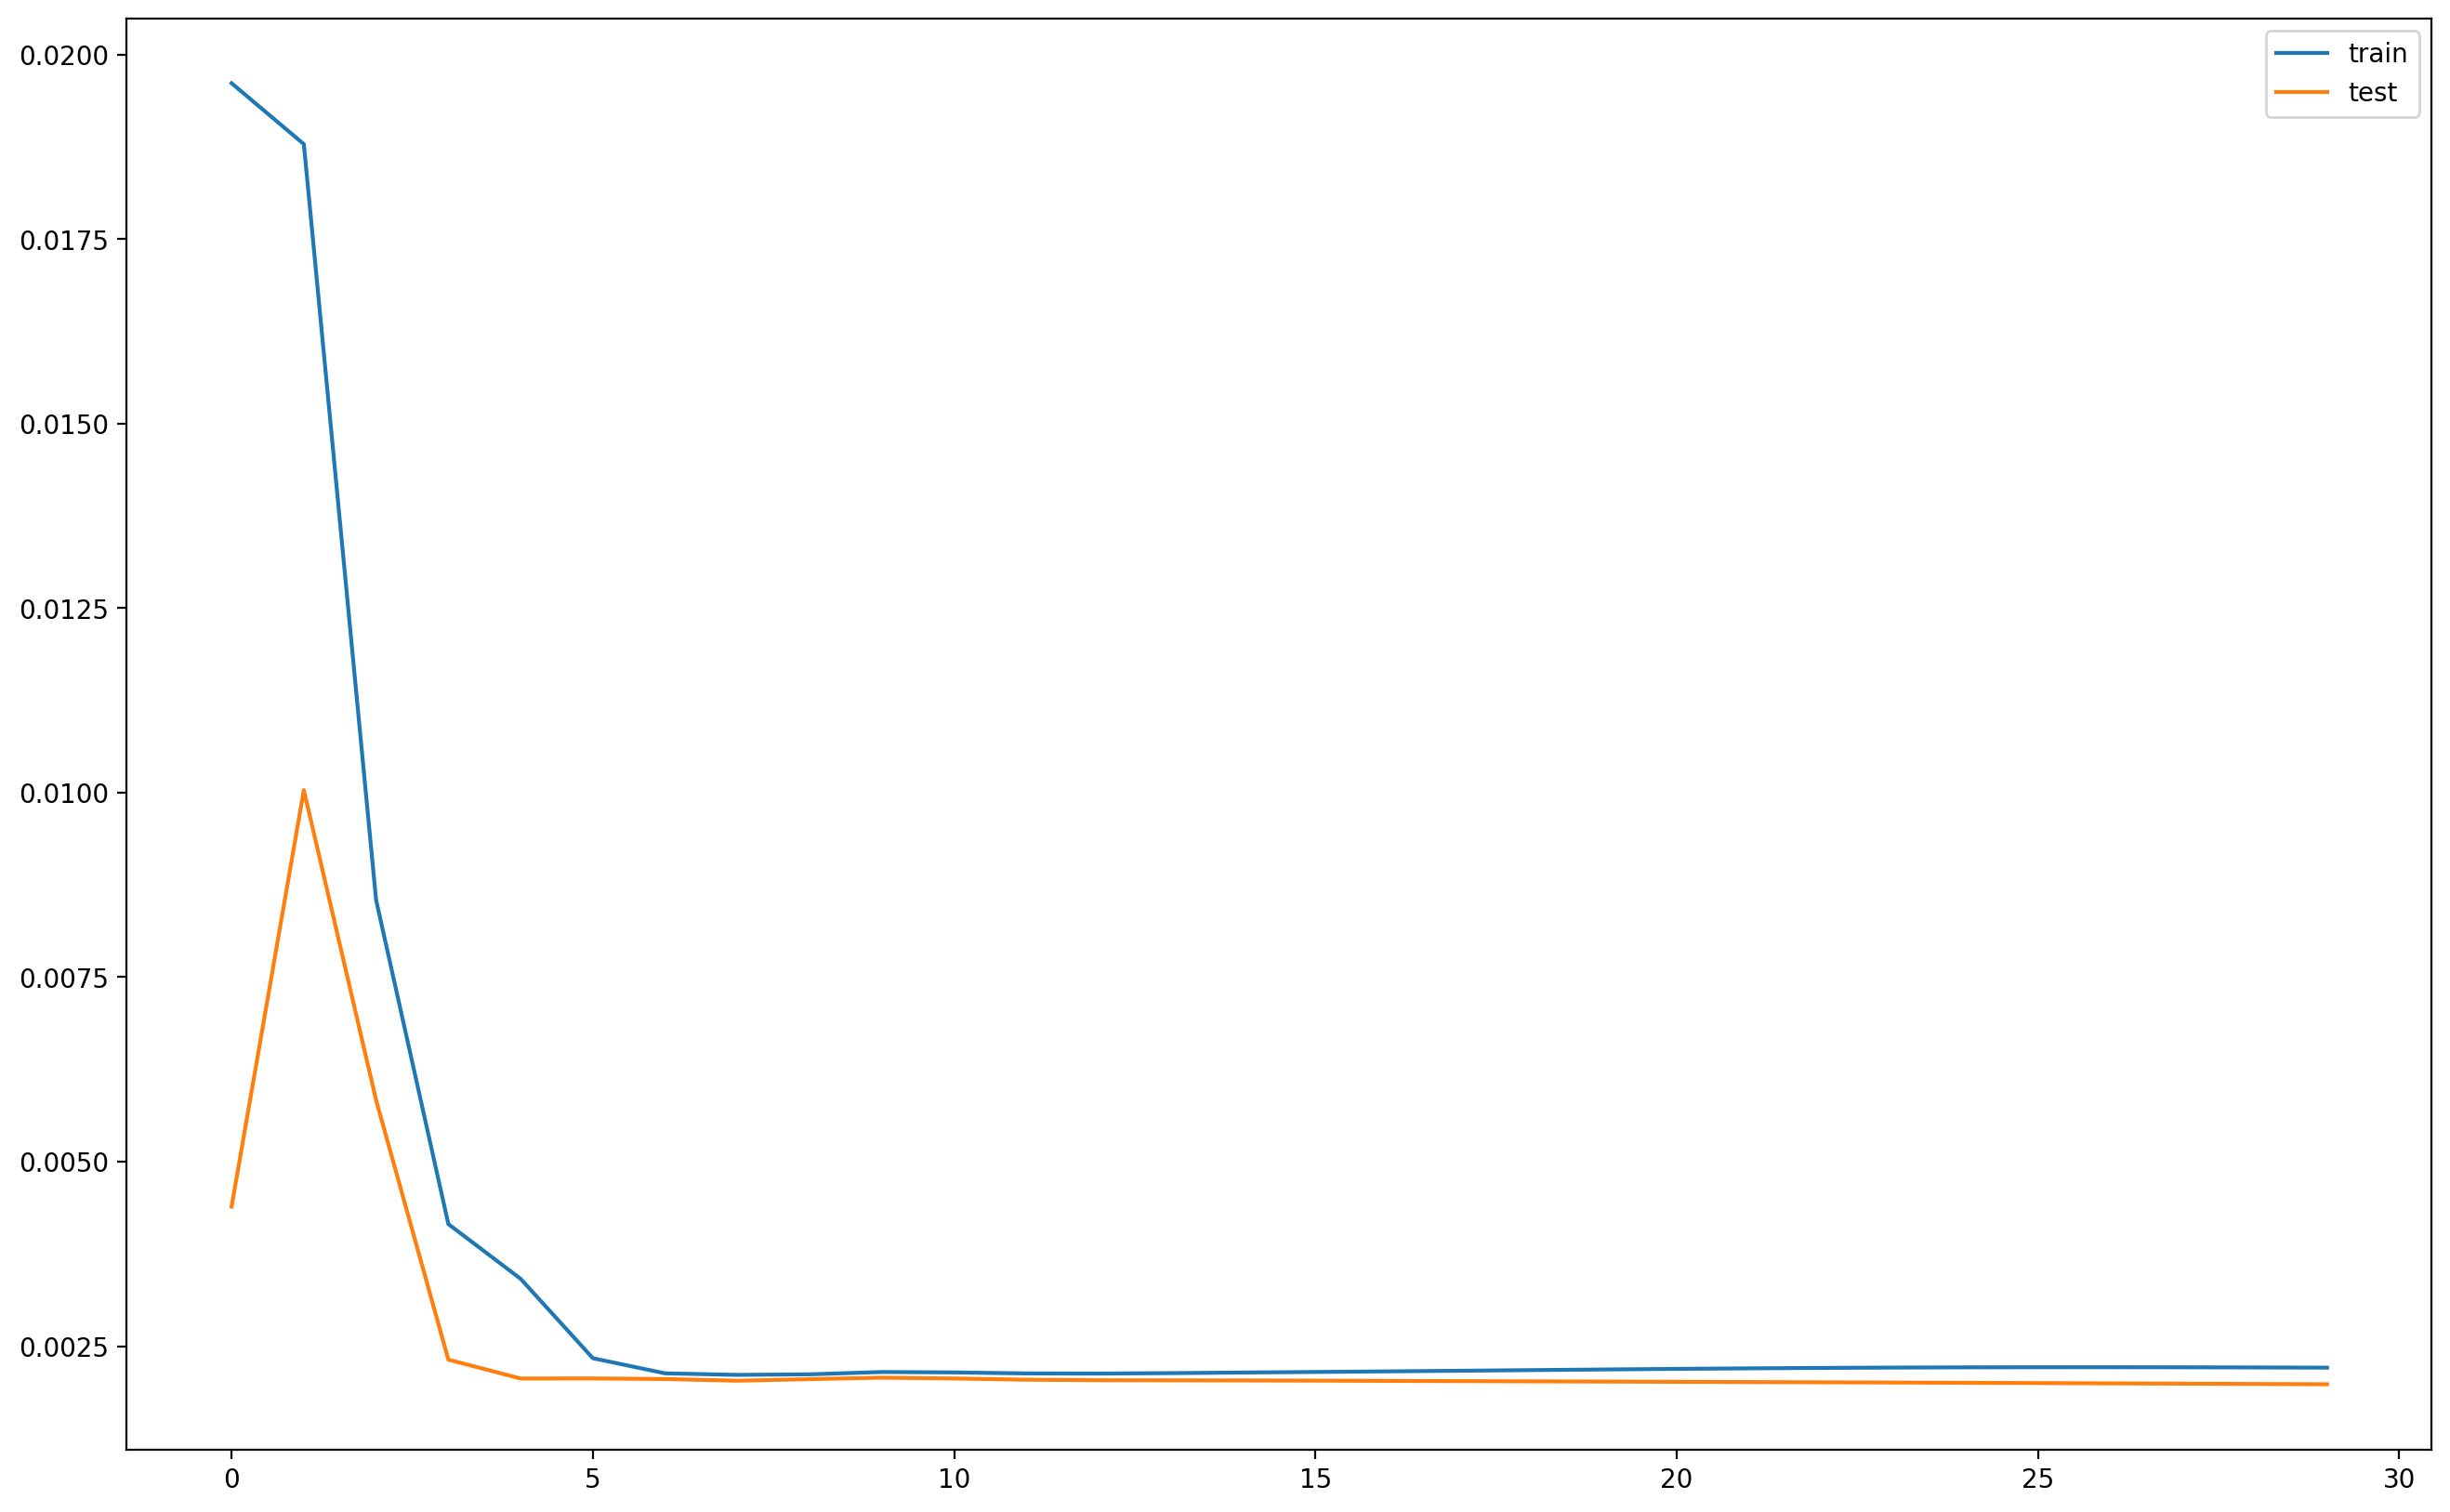

In [39]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

### <span style="color:#4CC9F0">Predicciones</span>

In [40]:
y_pred_gru =serie_0_1_model_gru.predict(X_test)
# escala original
y_pred_gru = scaler.inverse_transform(y_pred_gru)

5/5 [==============================] - 1s 35ms/step


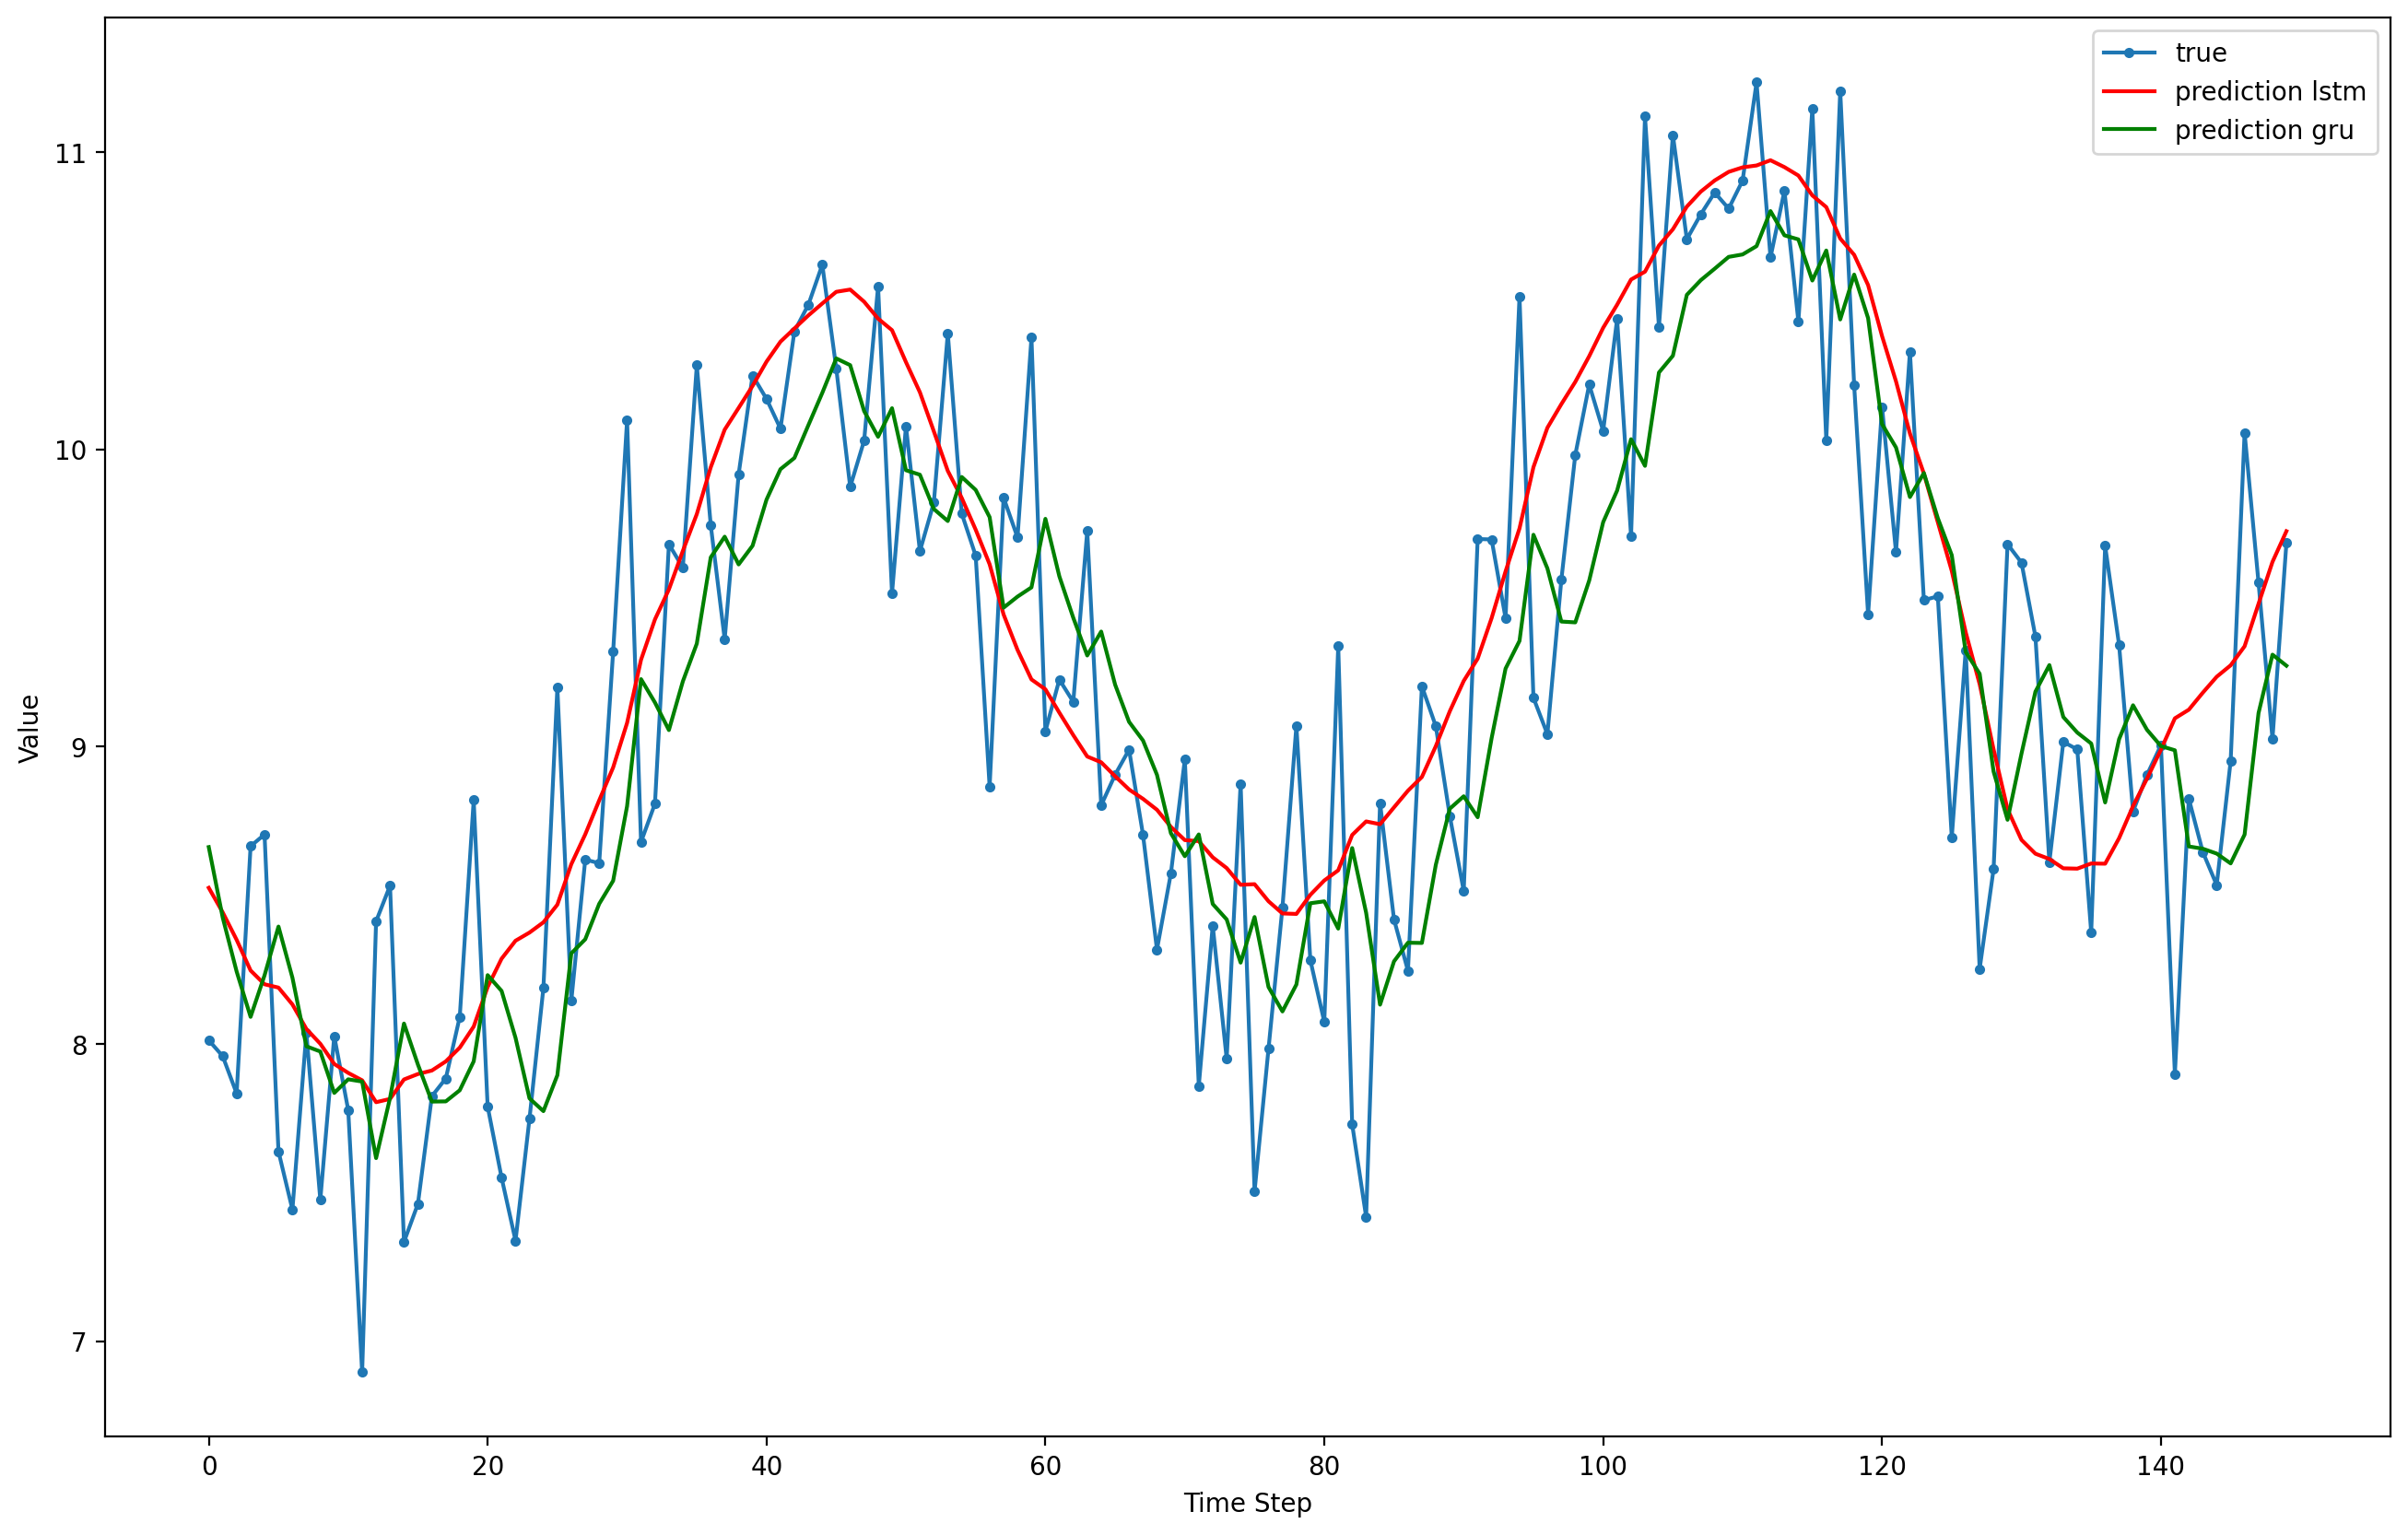

In [41]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction lstm")
plt.plot(y_pred_gru, 'g', label="prediction gru")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();


### <span style="color:#4CC9F0">Número de parámetros</span>

In [45]:
p= 60
n=1
3*(p*p +p*n+p)

11160